In [1]:
import warnings 
warnings.filterwarnings('ignore') 
# Importando as bibliotecas necessárias da diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.analytics import Bigquery, Dataflow, Composer, DataFusion
from diagrams.gcp.compute import Functions
from diagrams.gcp.ml import AIPlatform, Automl
from diagrams.gcp.storage import Storage
from diagrams.gcp.database import SQL as gcp_sql
from diagrams.custom import Custom 
from diagrams.generic.blank import Blank  
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage

# https://googlecloudcheatsheet.withgoogle.com/


#  Overview - 1.2

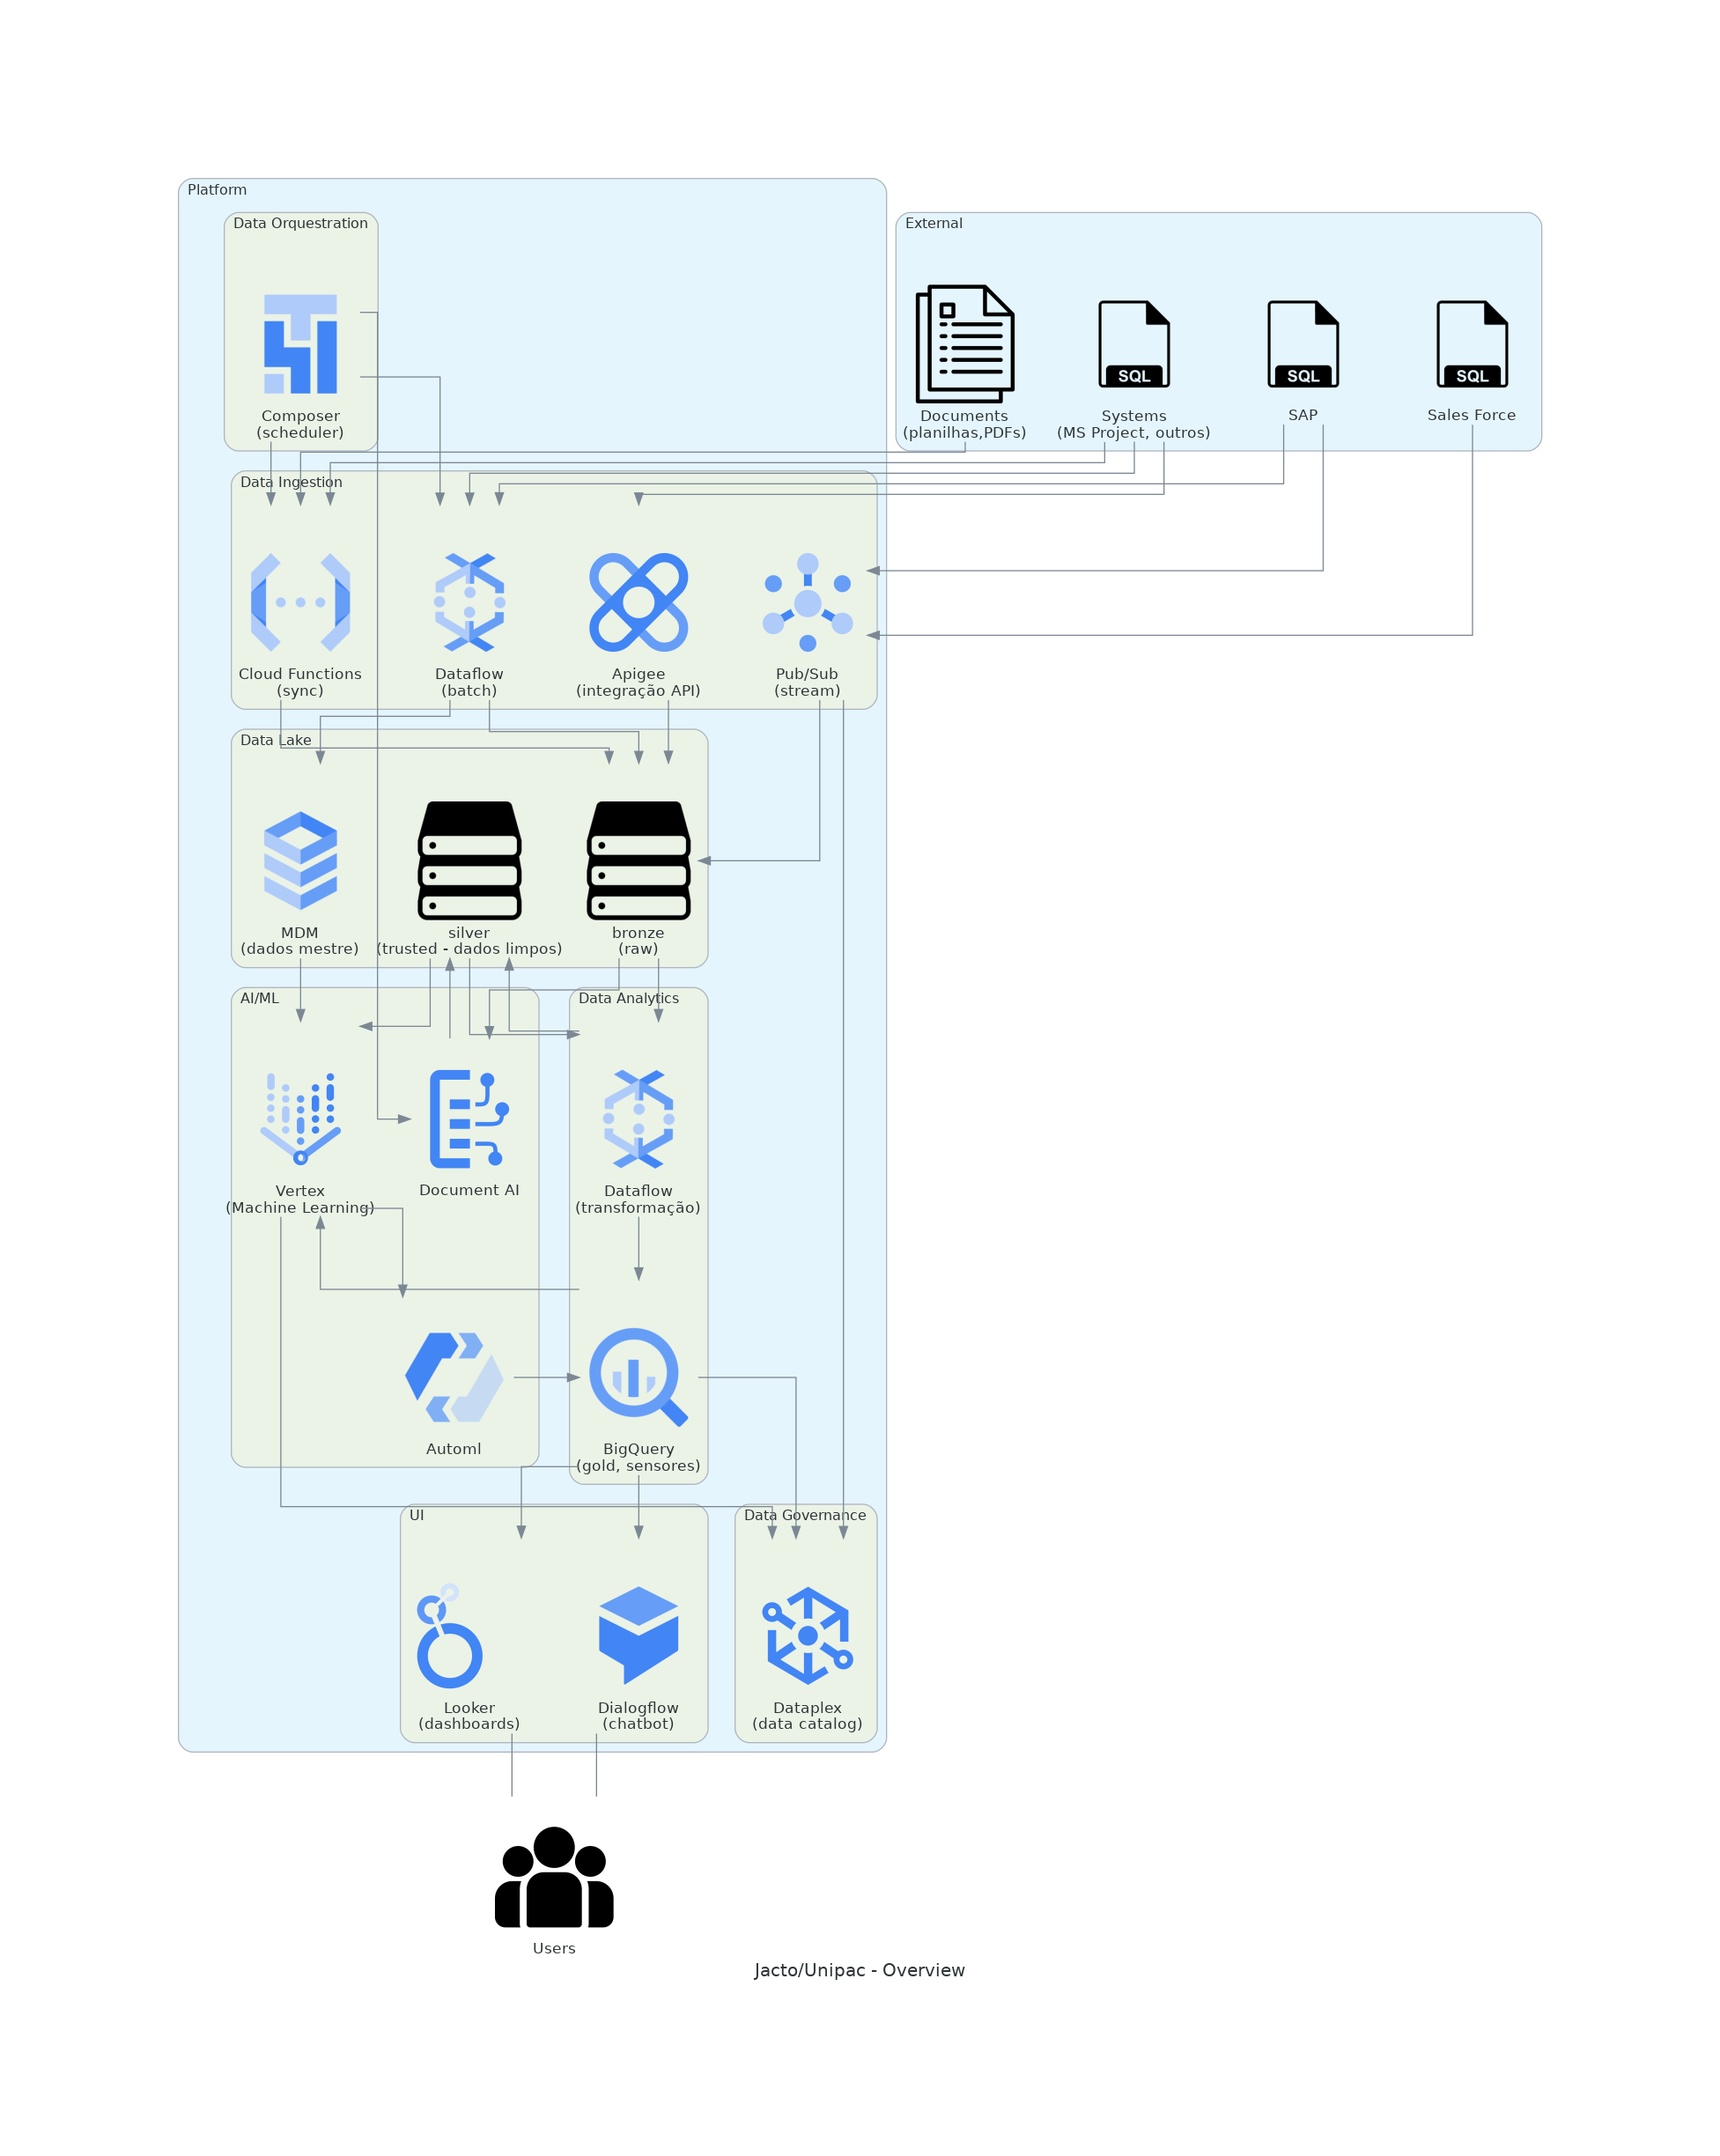

In [2]:
title = "Jacto/Unipac - Overview"
filename = "diagrams/jacto-unipac-overview"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")
  
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold, sensores)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            mdm = gcp_sql("MDM\n(dados mestre)")
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze, mdm]
    
    ## data transformation
    bronze >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    [dialogflow, looker] - users

diag


## S&OP

### Proposta 1 - S&OP Integrado 360° e Previsão de Demanda

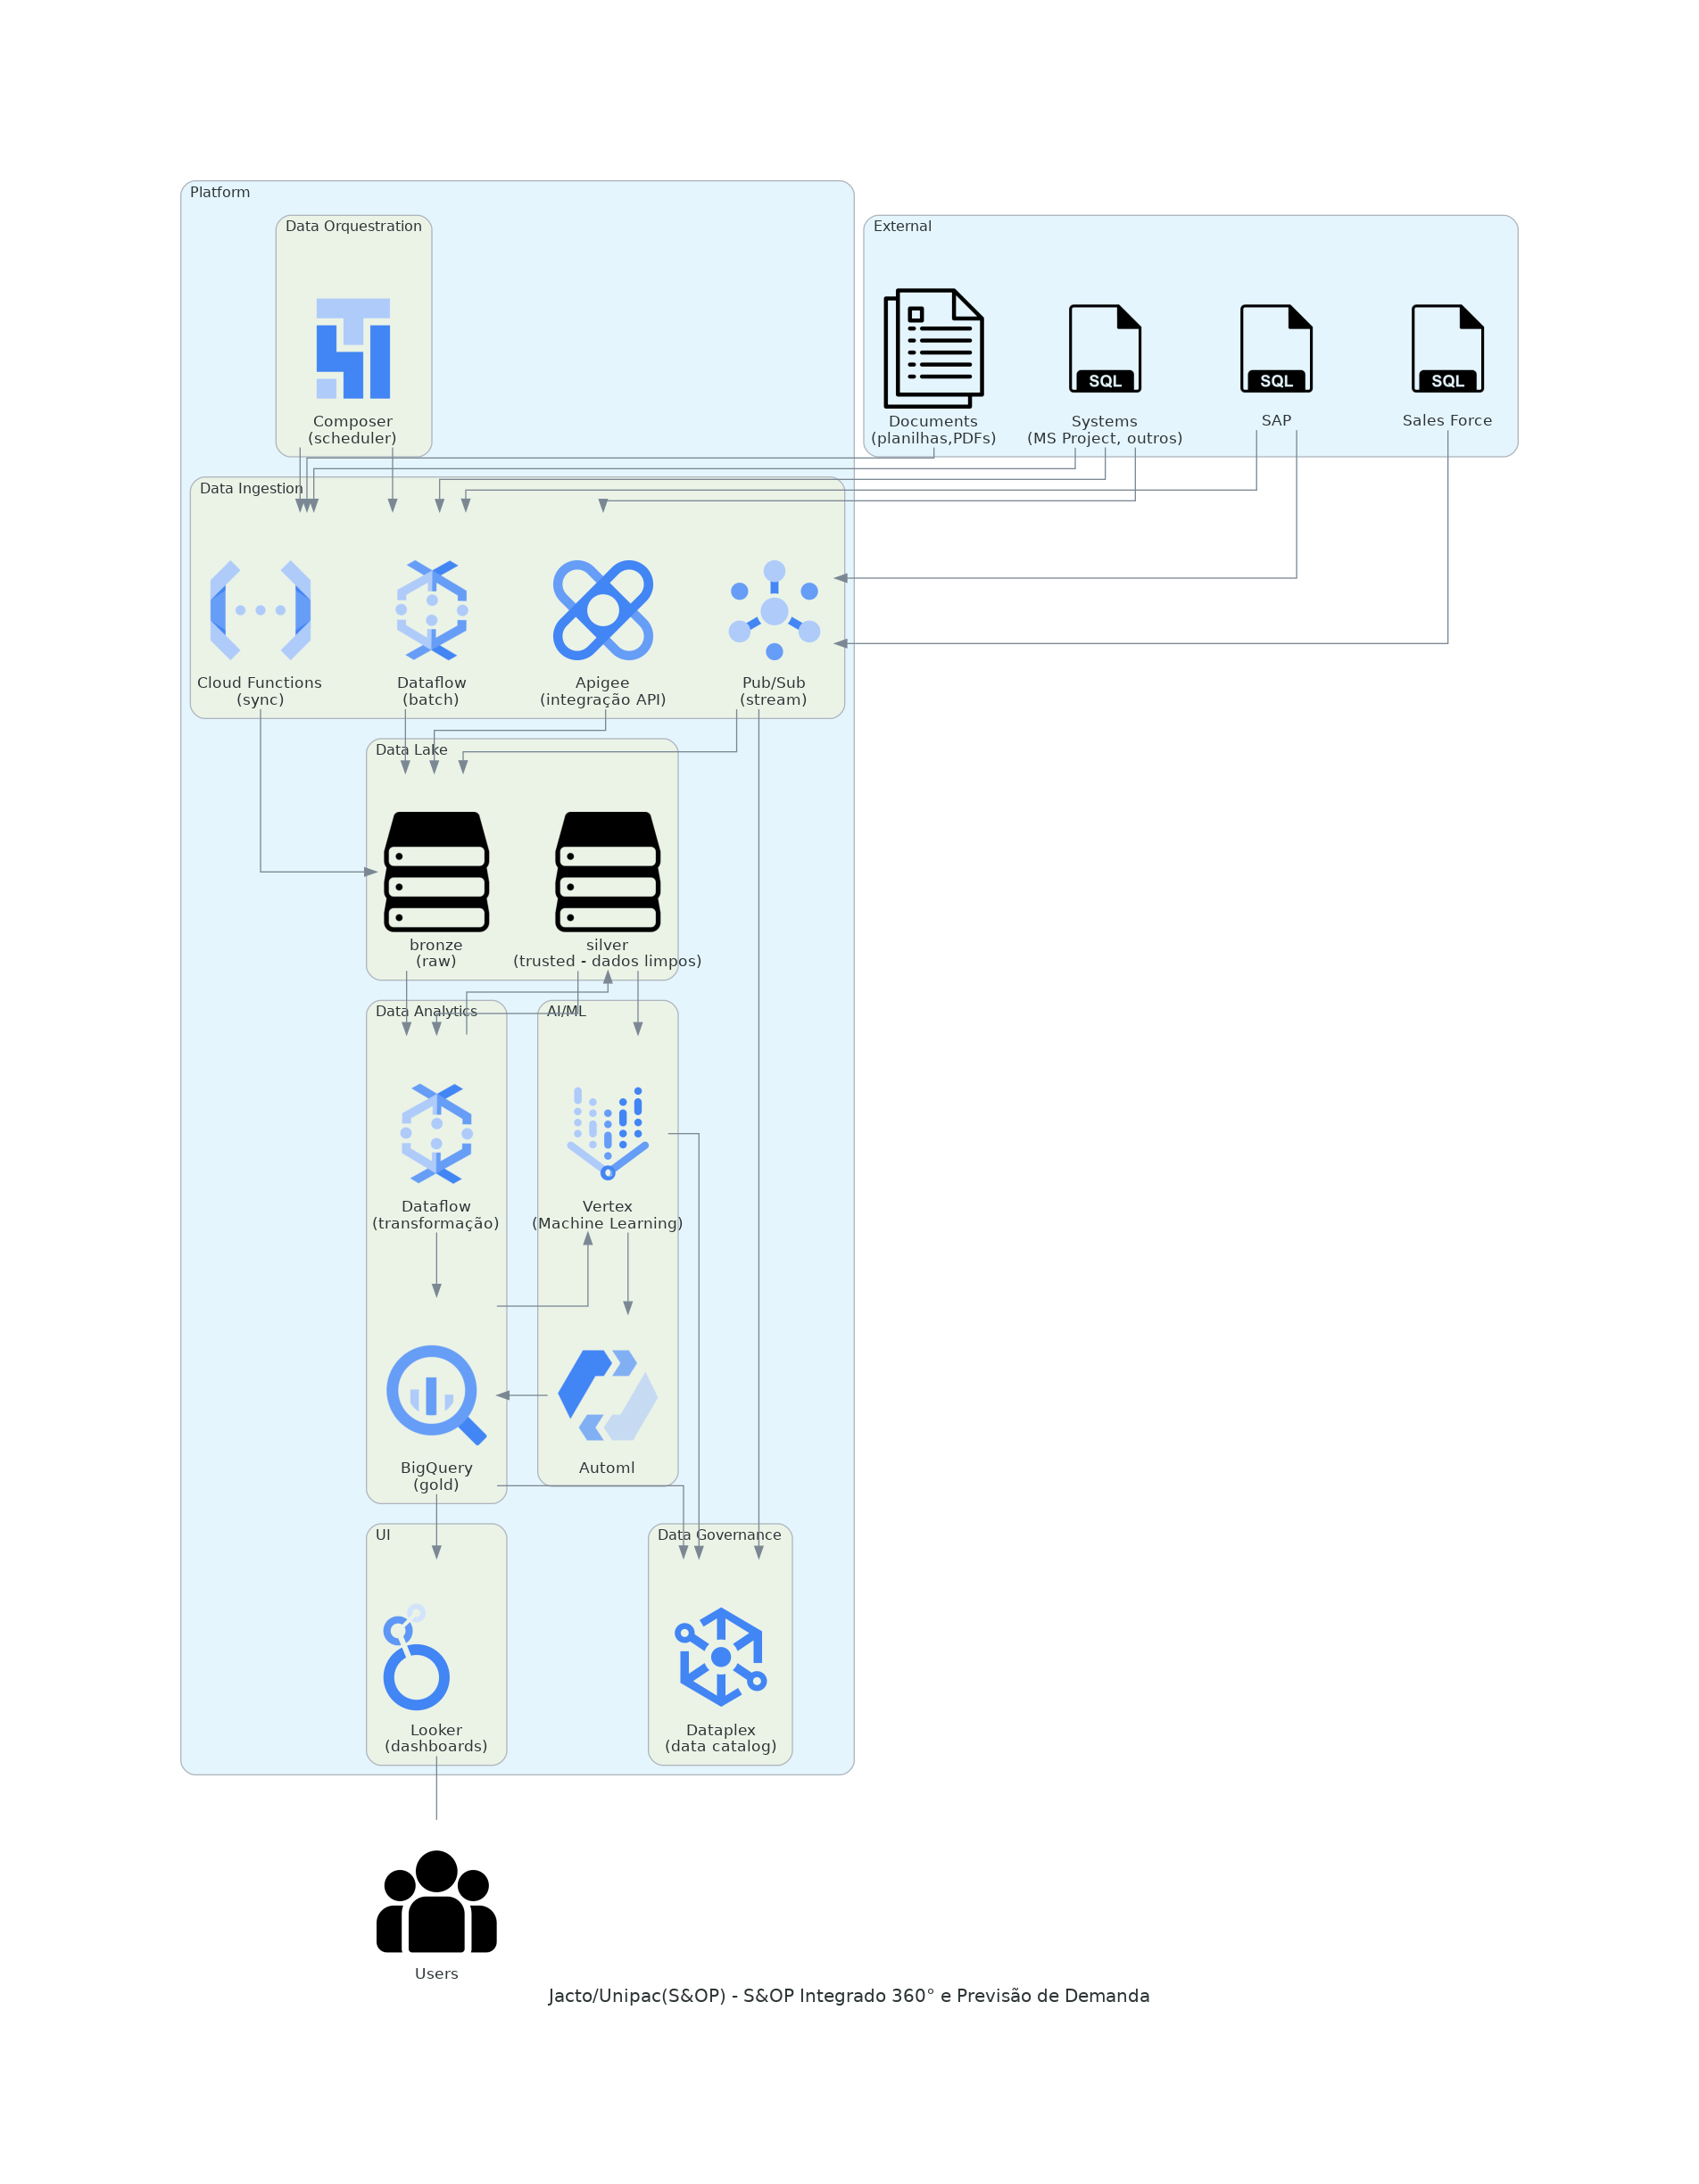

In [3]:

title = "Jacto/Unipac(S&OP) - S&OP Integrado 360° e Previsão de Demanda"
filename = "diagrams/jacto-unipac-sop-proposta1-venda"


# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


### Proposta 2 - S&OP Logística Inteligente e Otimização de Estoque

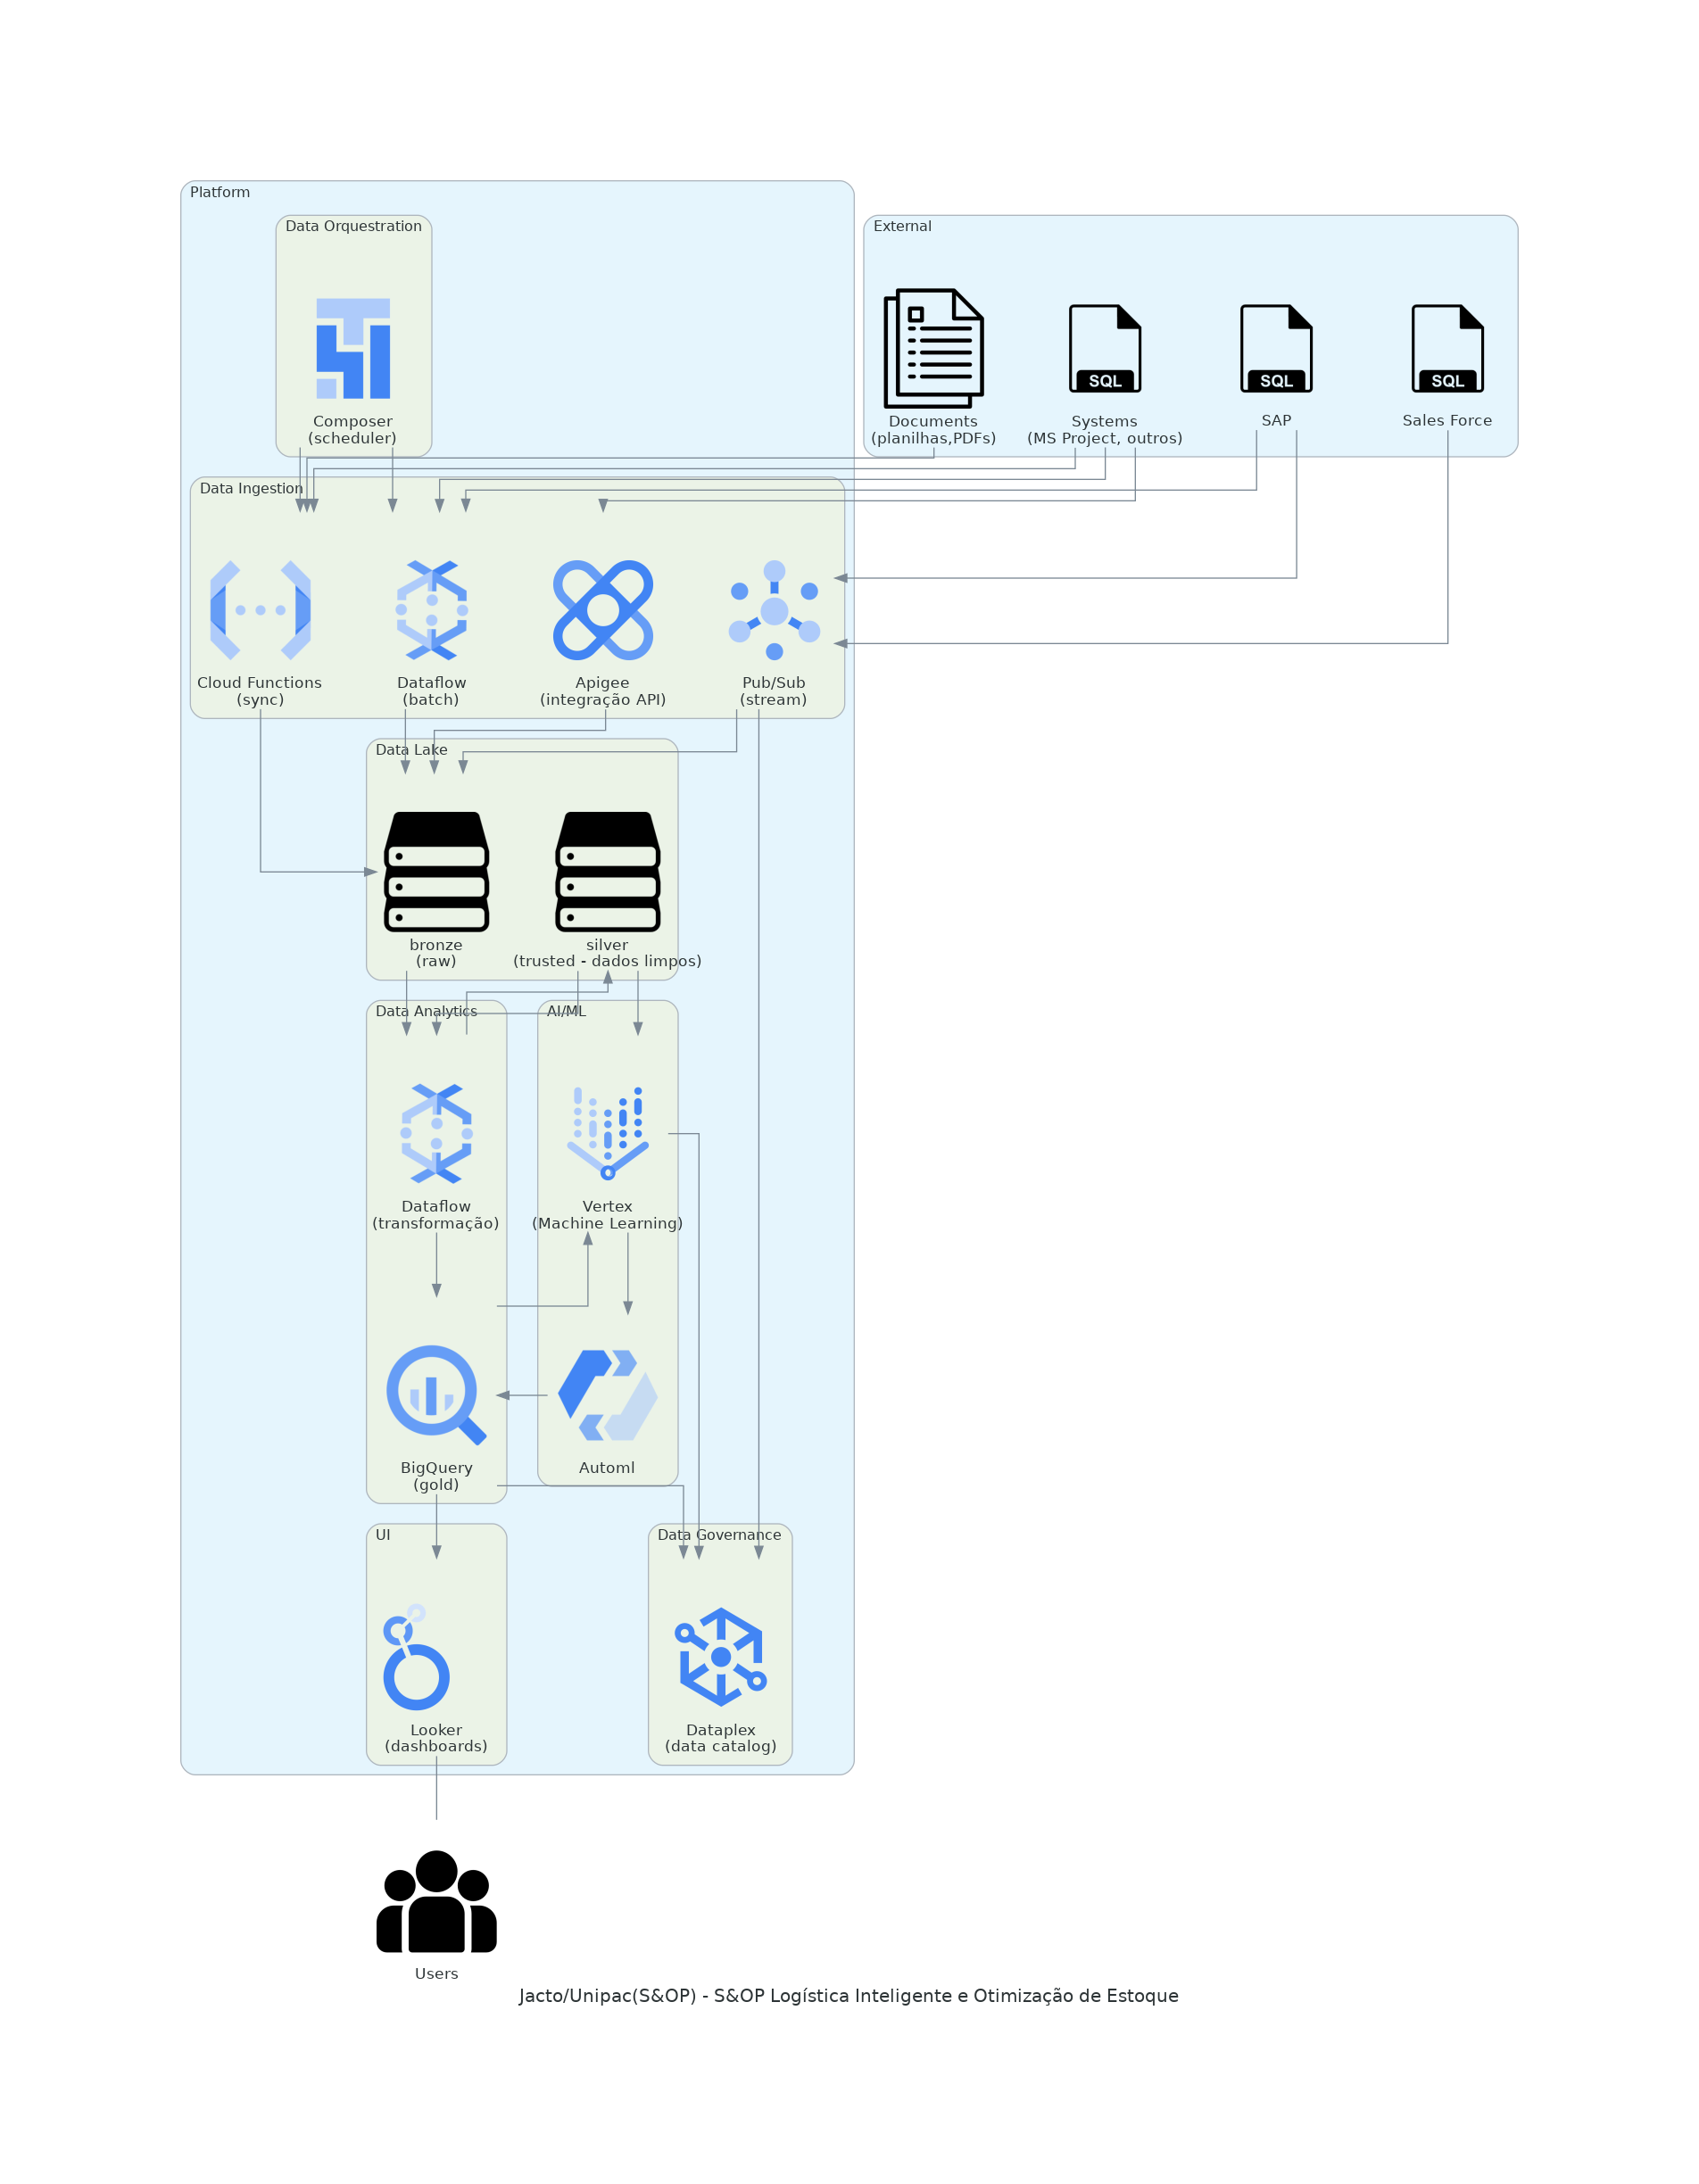

In [4]:

title = "Jacto/Unipac(S&OP) - S&OP Logística Inteligente e Otimização de Estoque"
filename = "diagrams/jacto-unipac-sop-proposta2-logistica"


# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


### Proposta 3 - Torre de Controle Unipac

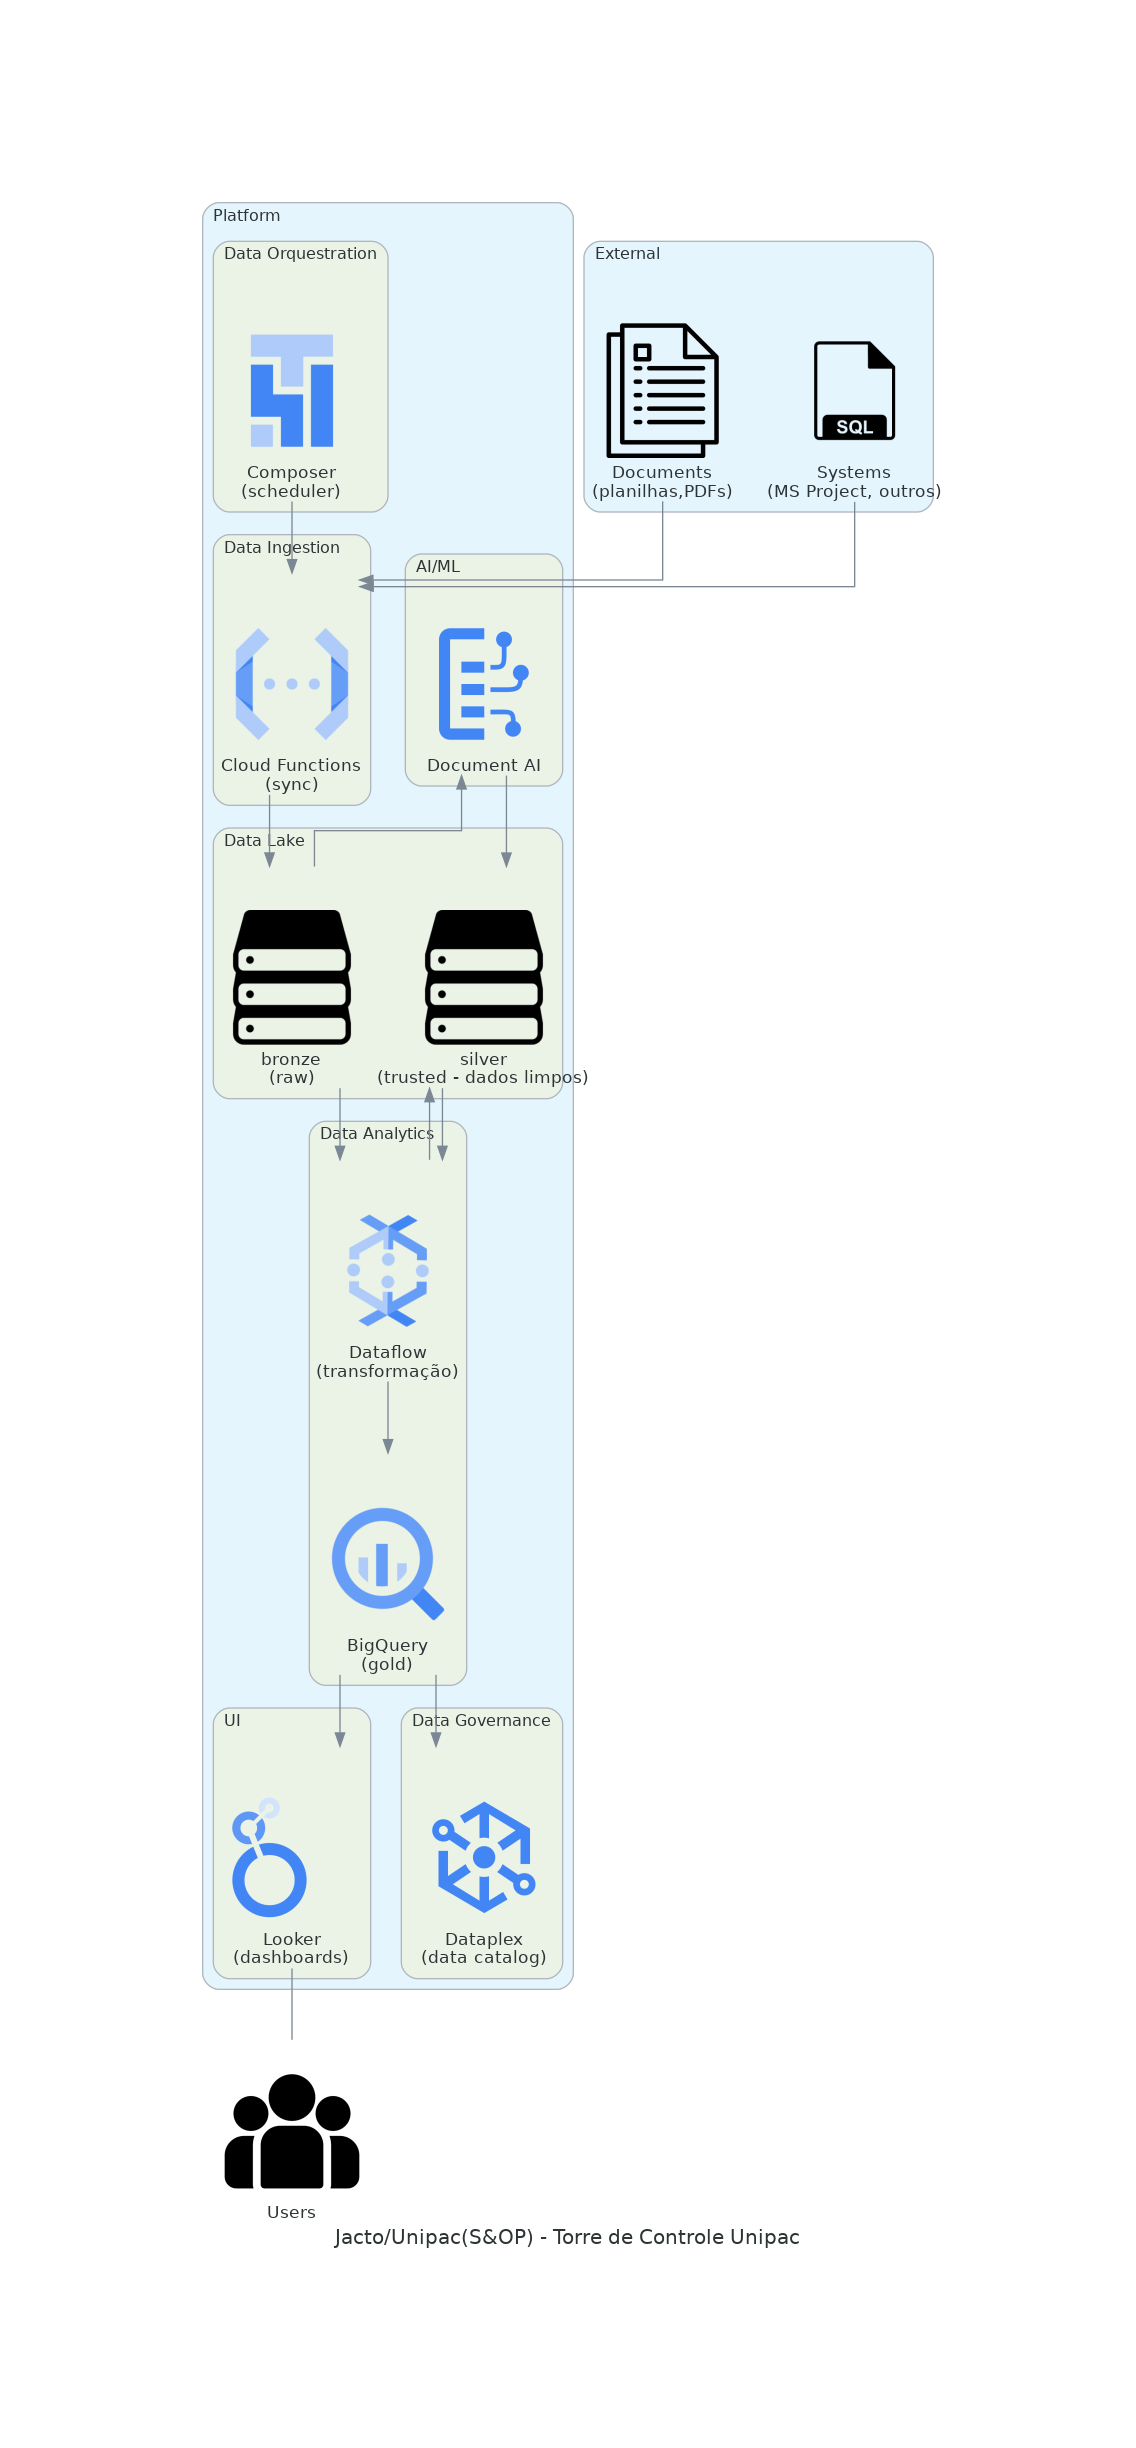

In [12]:
title = "Jacto/Unipac(S&OP) - Torre de Controle Unipac"
filename = "diagrams/jacto-unipac-sop-proposta3-torre"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           

    with Cluster("Platform"):    

        # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)")        

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  

    composer >> [sync]

    ## data ingestion
    [documents, external_system] >> sync >> bronze

    ## data transformation
    bronze >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold
    
    
    ## ui
    gold >> looker
    
    [vertex, gold, stream] >> datacatalog

    looker - users

diag


## Centralidade do Cliente

### Proposta 4 - Jornada do Cliente 360° e Controle do Nível Econômico

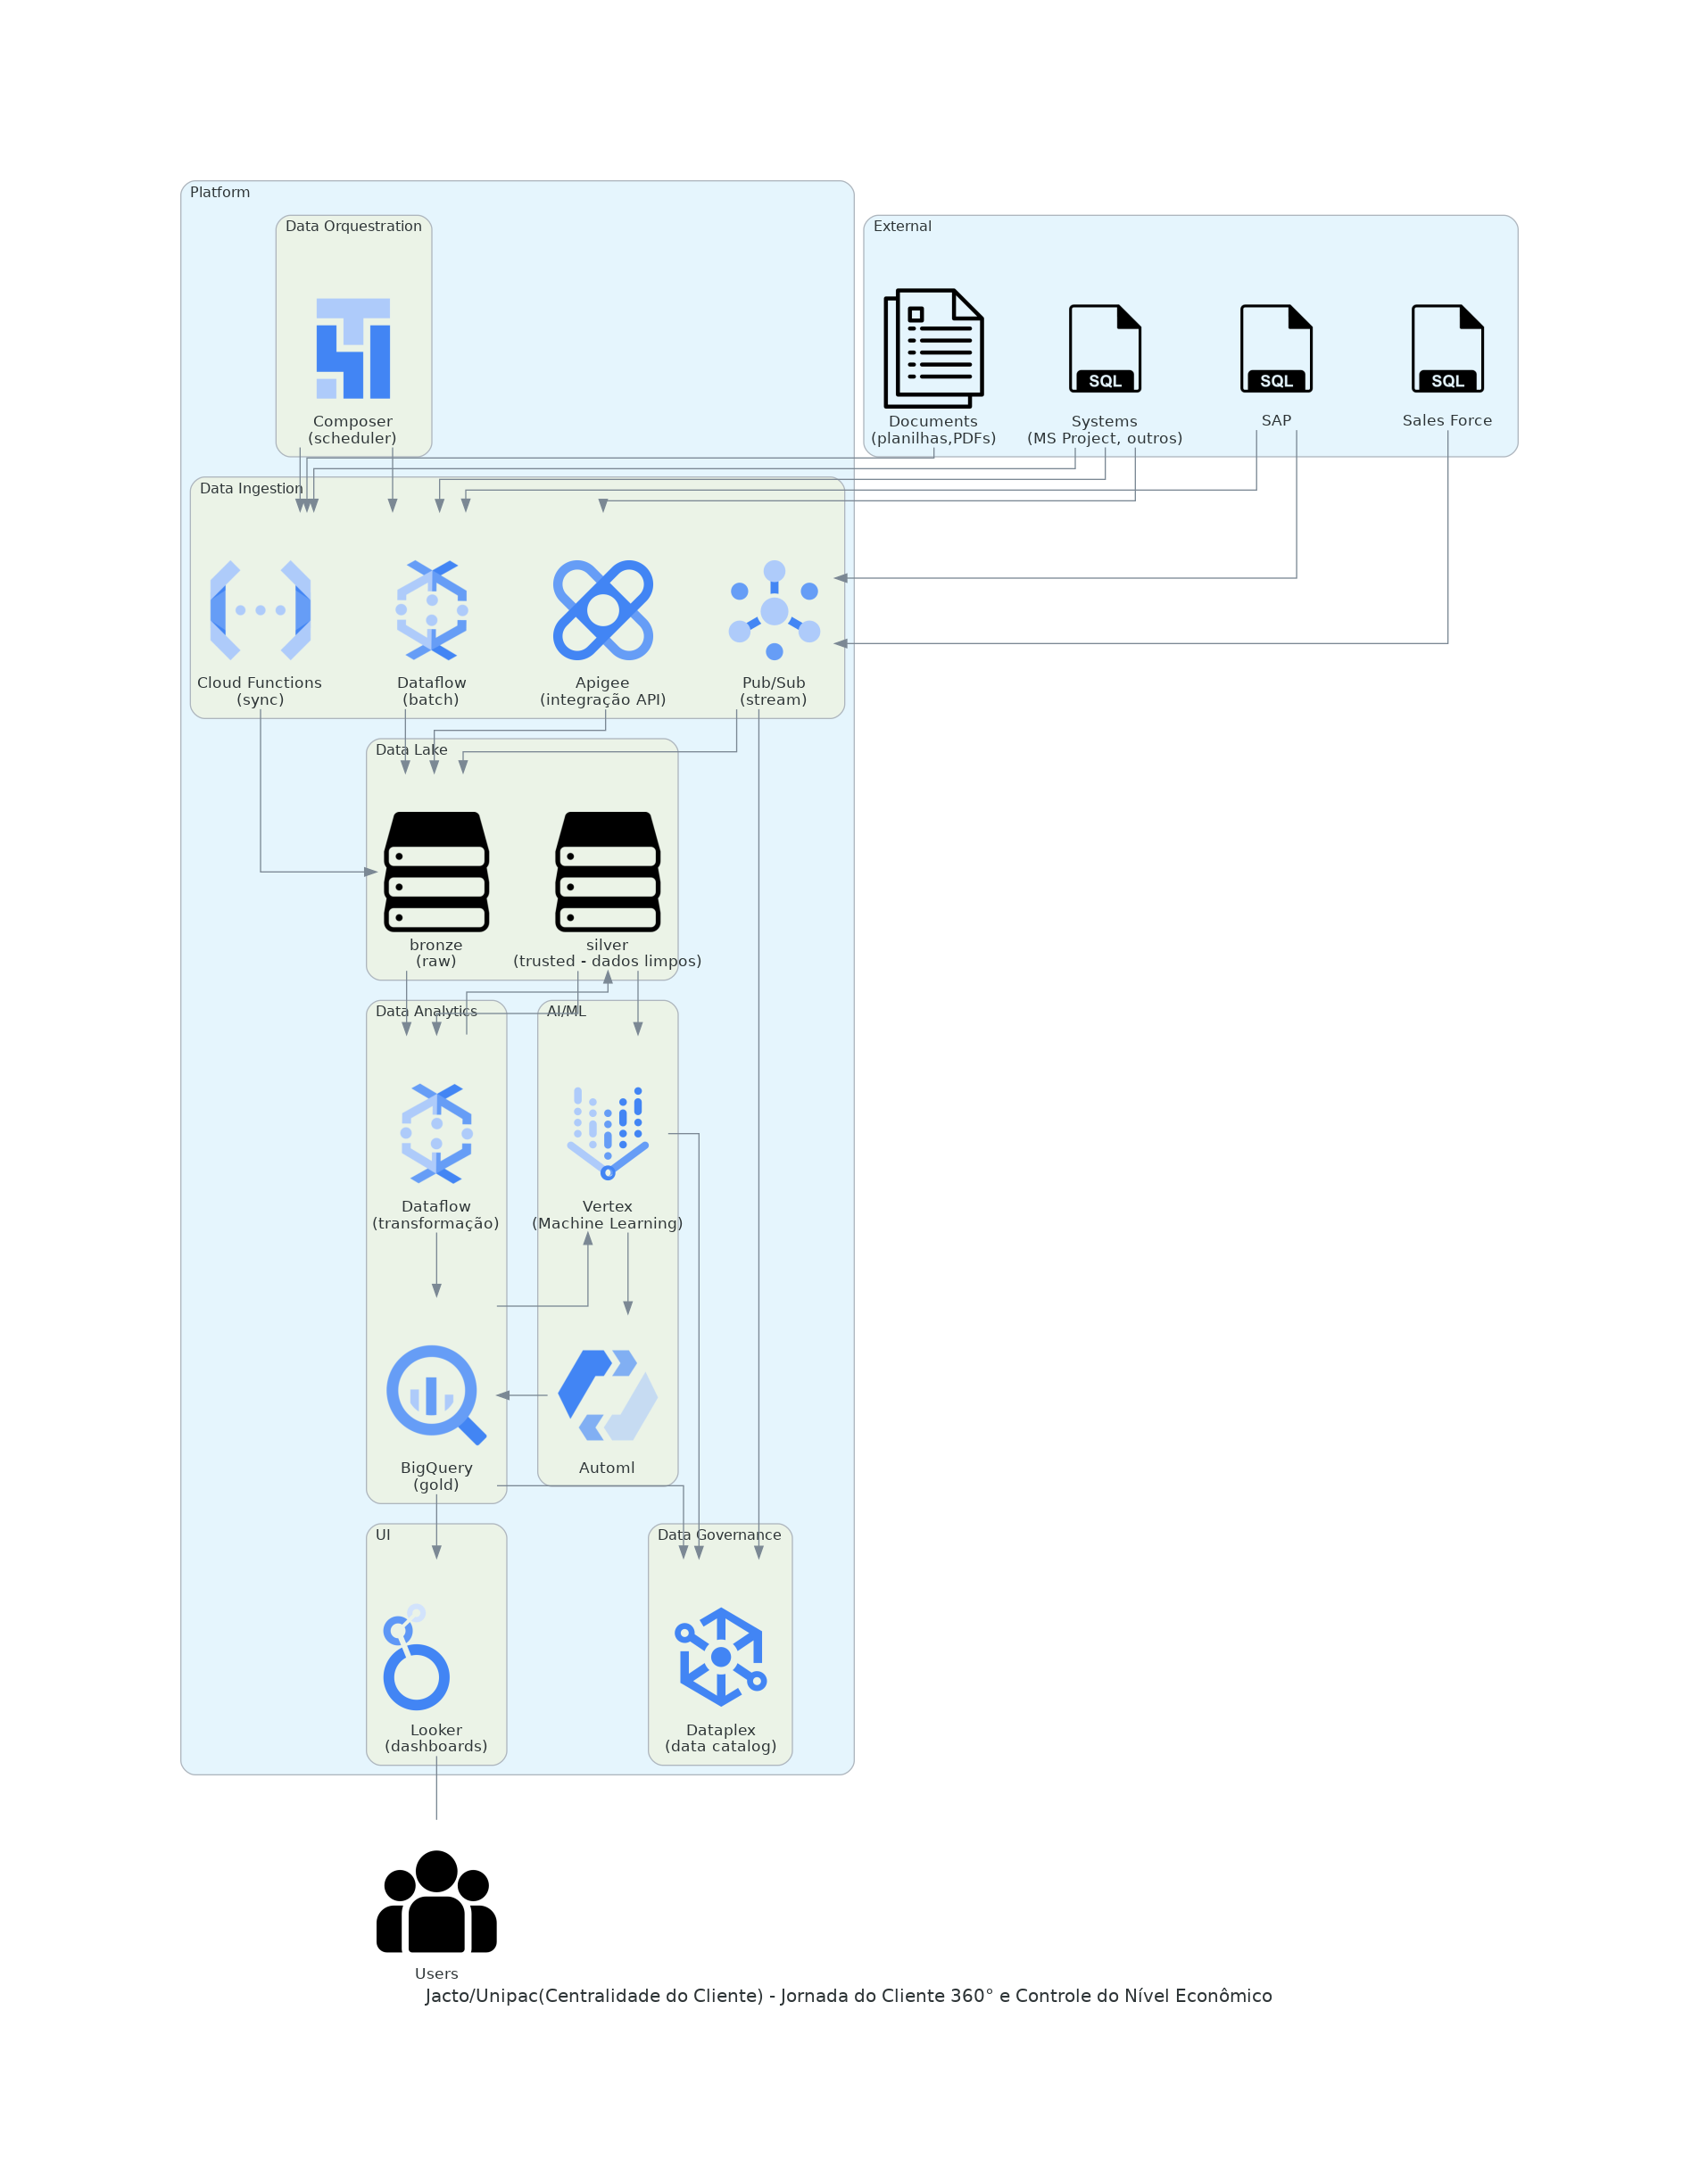

In [6]:
title = "Jacto/Unipac(Centralidade do Cliente) - Jornada do Cliente 360° e Controle do Nível Econômico"
filename = "diagrams/jacto-unipac-centralidade-proposta4-jornada"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

## Desenvolvimento de Produto

### Proposta 5 - P&D Integrado 360° e Otimização de Blendas

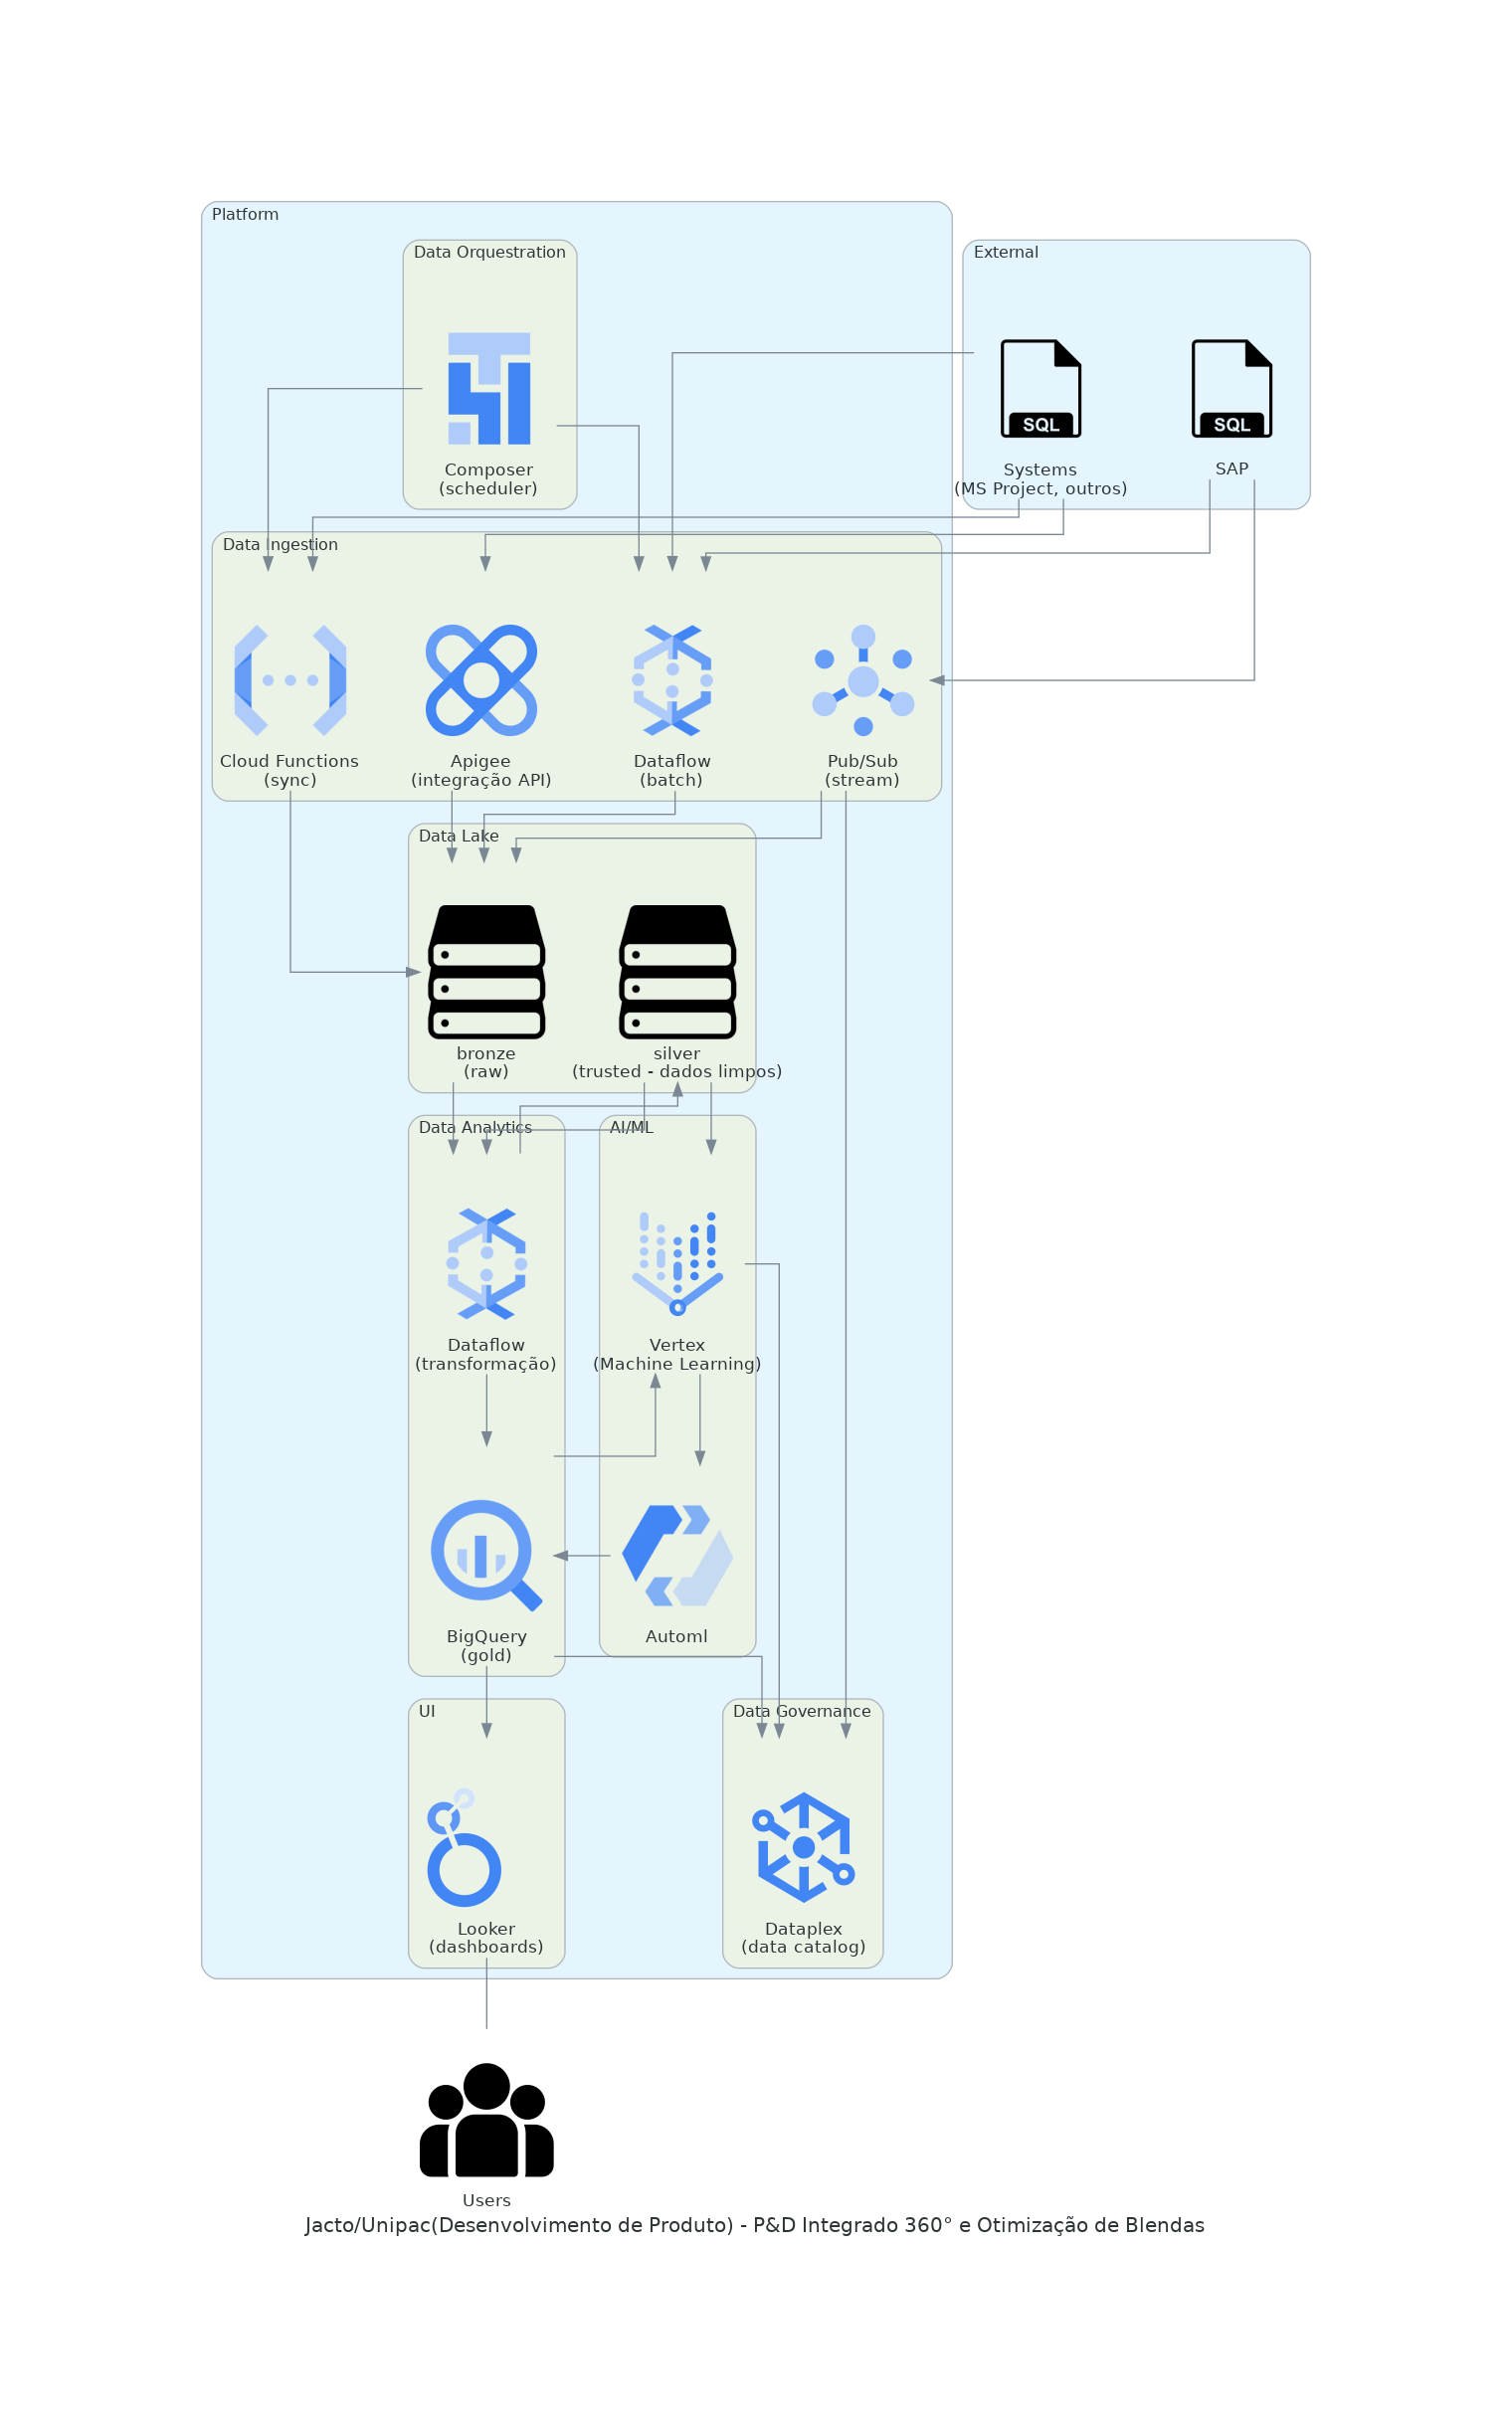

In [7]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - P&D Integrado 360° e Otimização de Blendas"
filename = "diagrams/jacto-unipac-produto-proposta5-blendas"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Systems\n(MS Project, outros)")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]


    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


### Proposta 6 - Automação e Eficiência Operacional em P&D

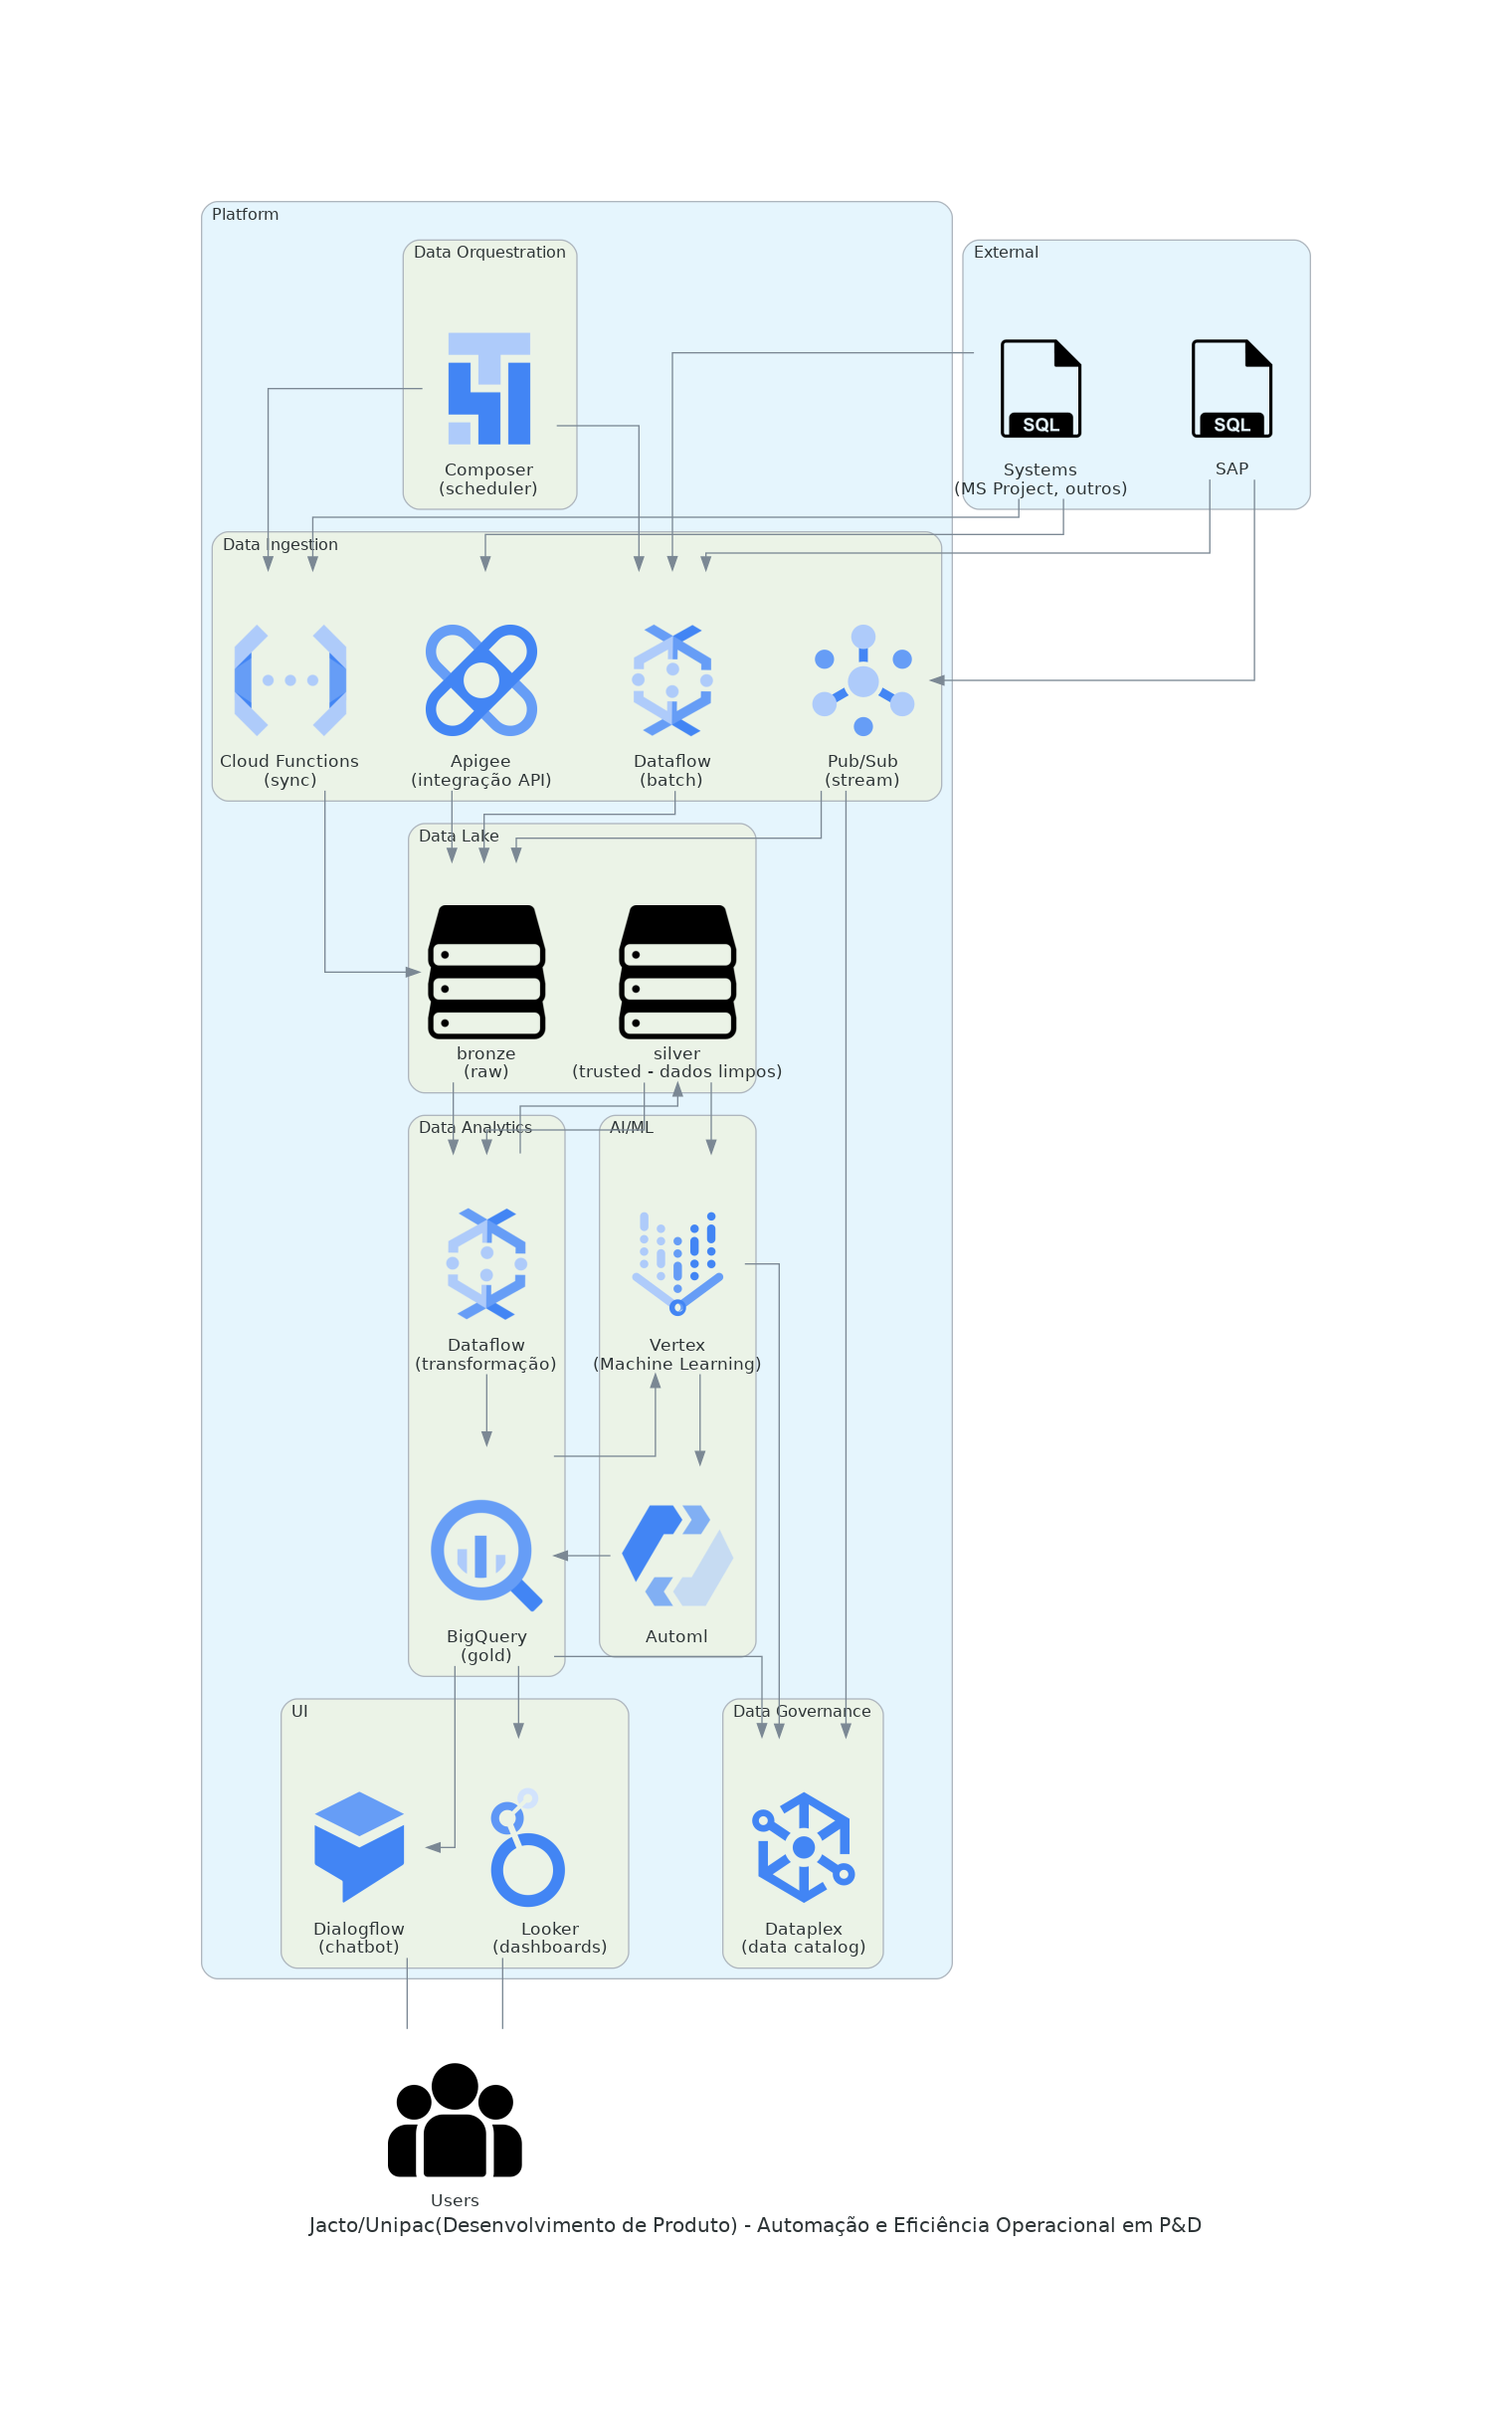

In [8]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Automação e Eficiência Operacional em P&D"
filename = "diagrams/jacto-unipac-produto-proposta6-automacao"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Systems\n(MS Project, outros)")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]


    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker
    gold >> dialogflow

    [vertex, gold, stream] >> datacatalog

    looker - users
    dialogflow - users


diag

## Compras

### Proposta 7 - Jornada do Fornecedor 360° e Relacionamento Eficiente

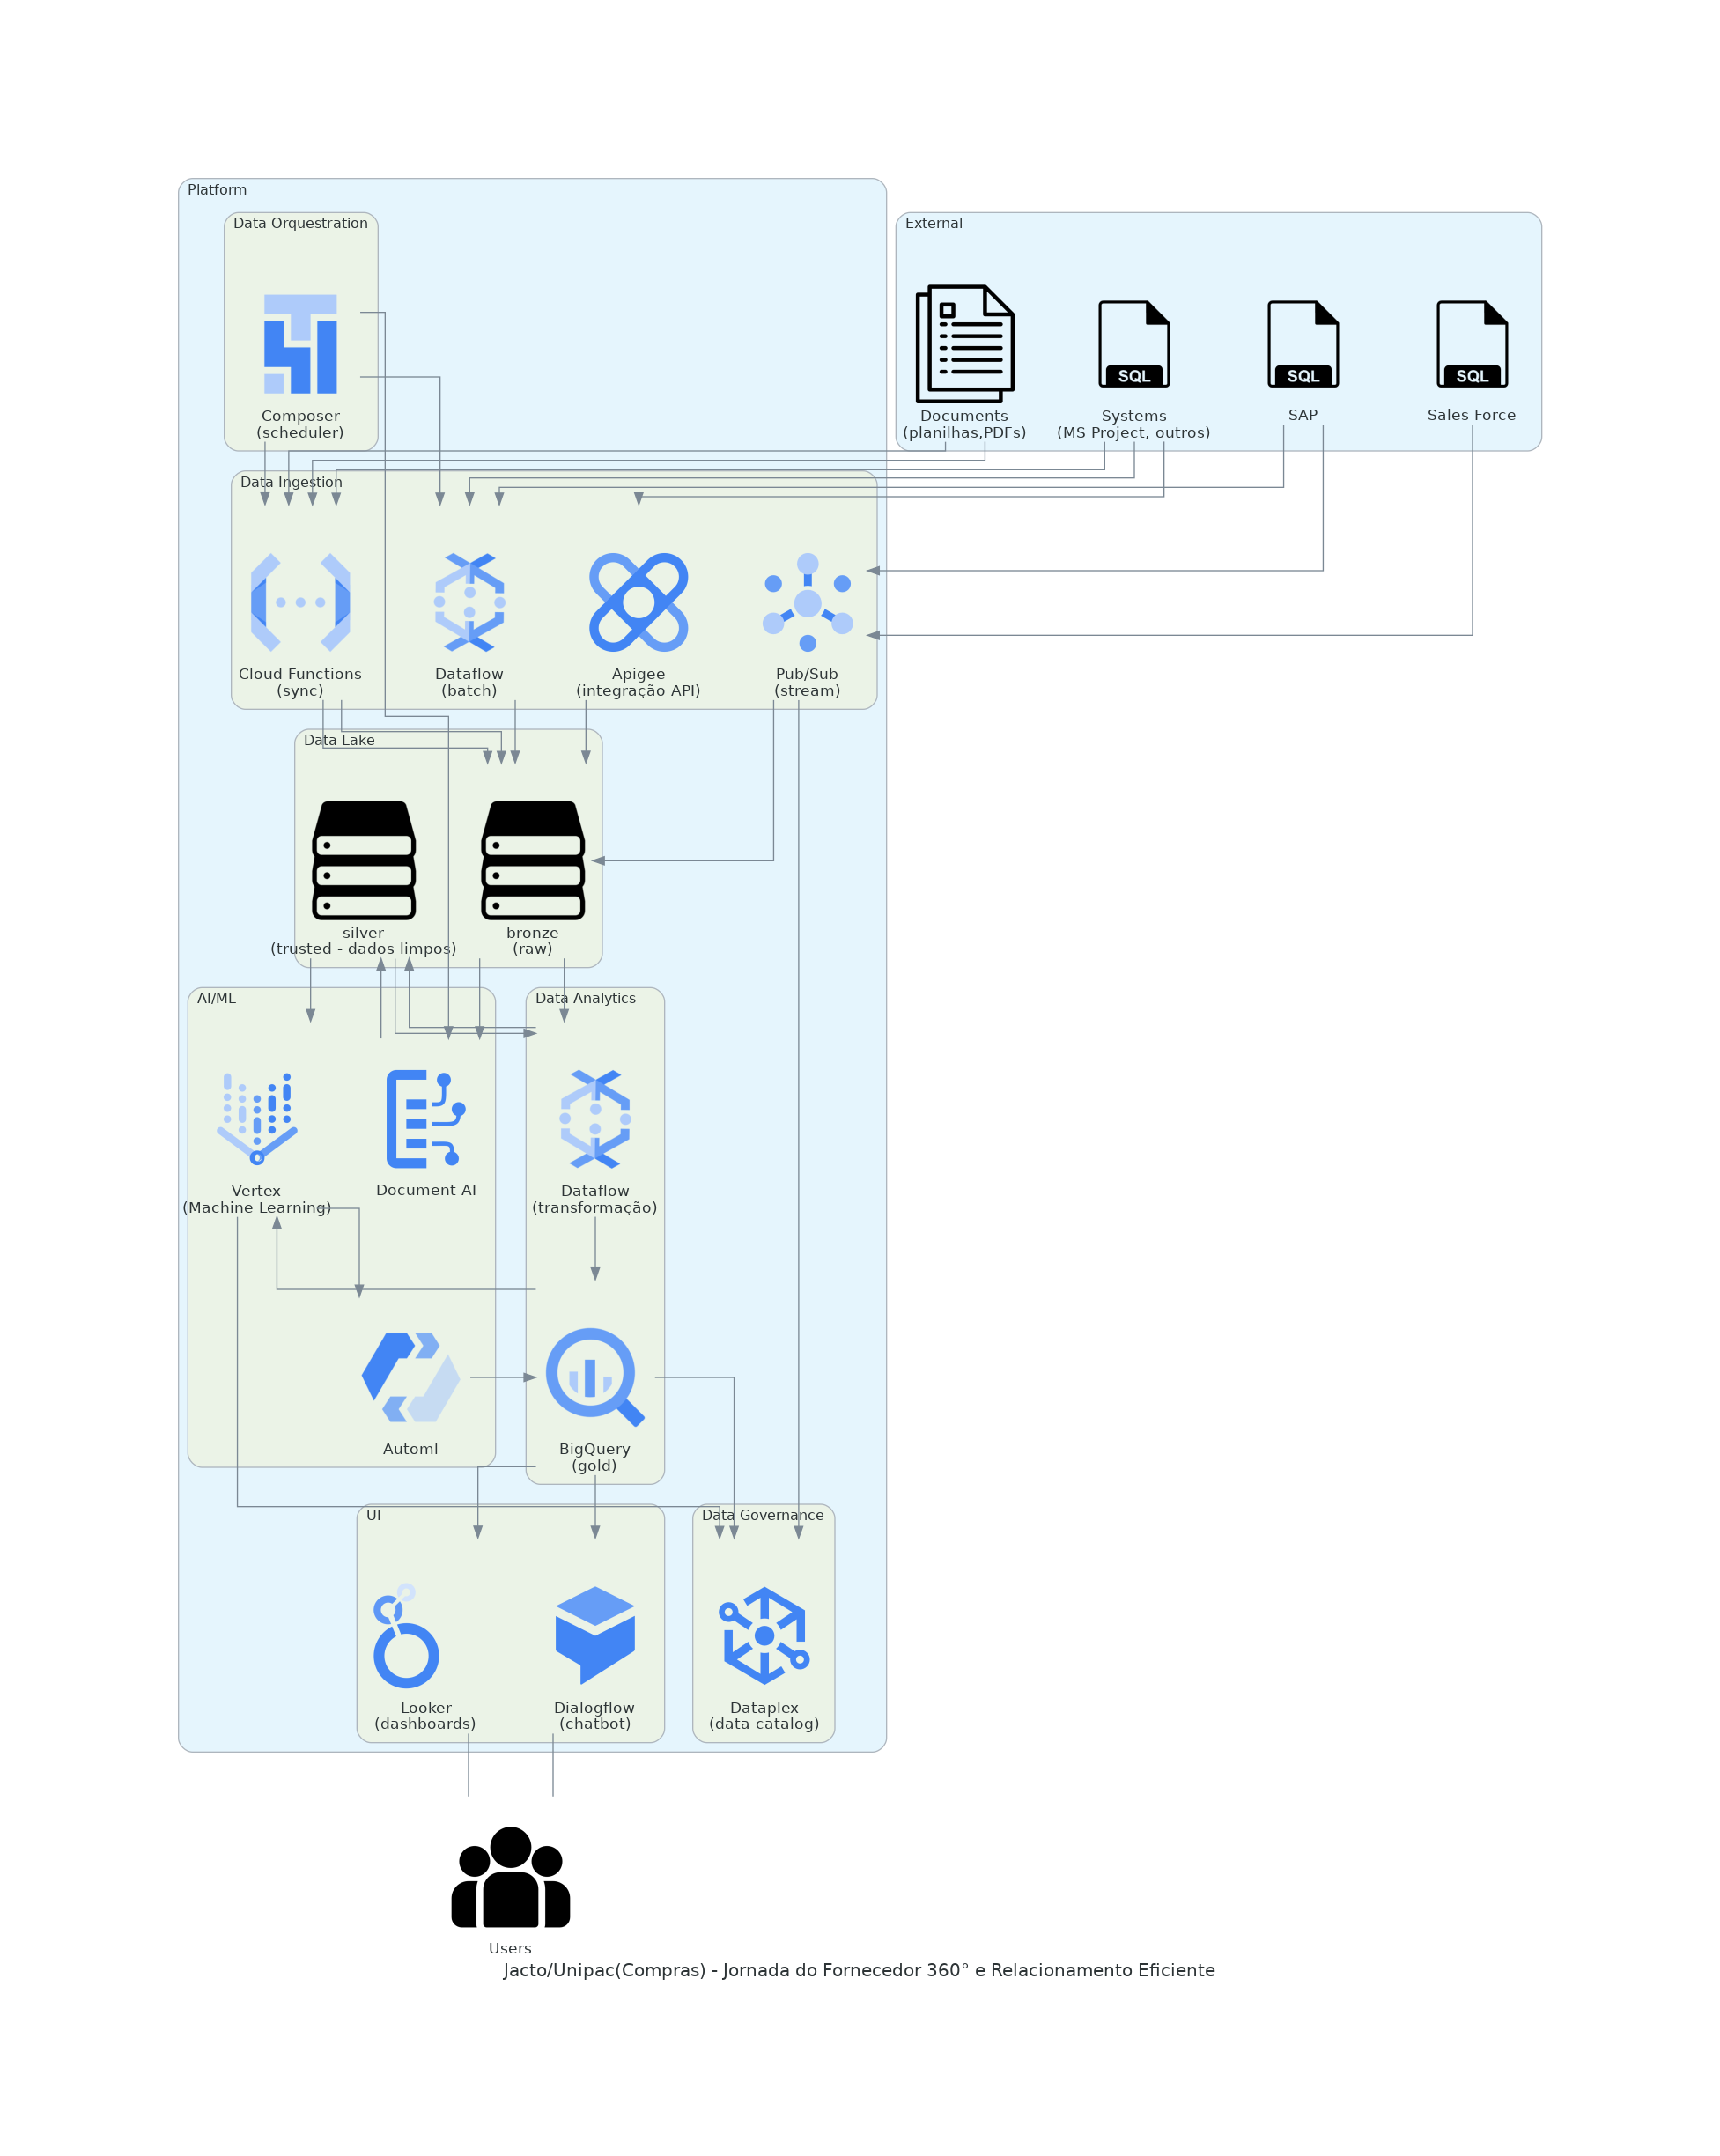

In [9]:
title = "Jacto/Unipac(Compras) - Jornada do Fornecedor 360° e Relacionamento Eficiente"
filename = "diagrams/jacto-unipac-compras-proposta7-jornada"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")  

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
                   

        with Cluster("Data Governance"):
            
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]
    documents >> sync >> bronze


    ## data transformation
    bronze >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

 # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    
    ## ui
    gold >> looker
    gold >> dialogflow

    [vertex, gold, stream] >> datacatalog

    looker - users
    dialogflow - users

diag

### Proposta 8 - Compras Integrado 360° e Otimização de Contratos de Material Direto

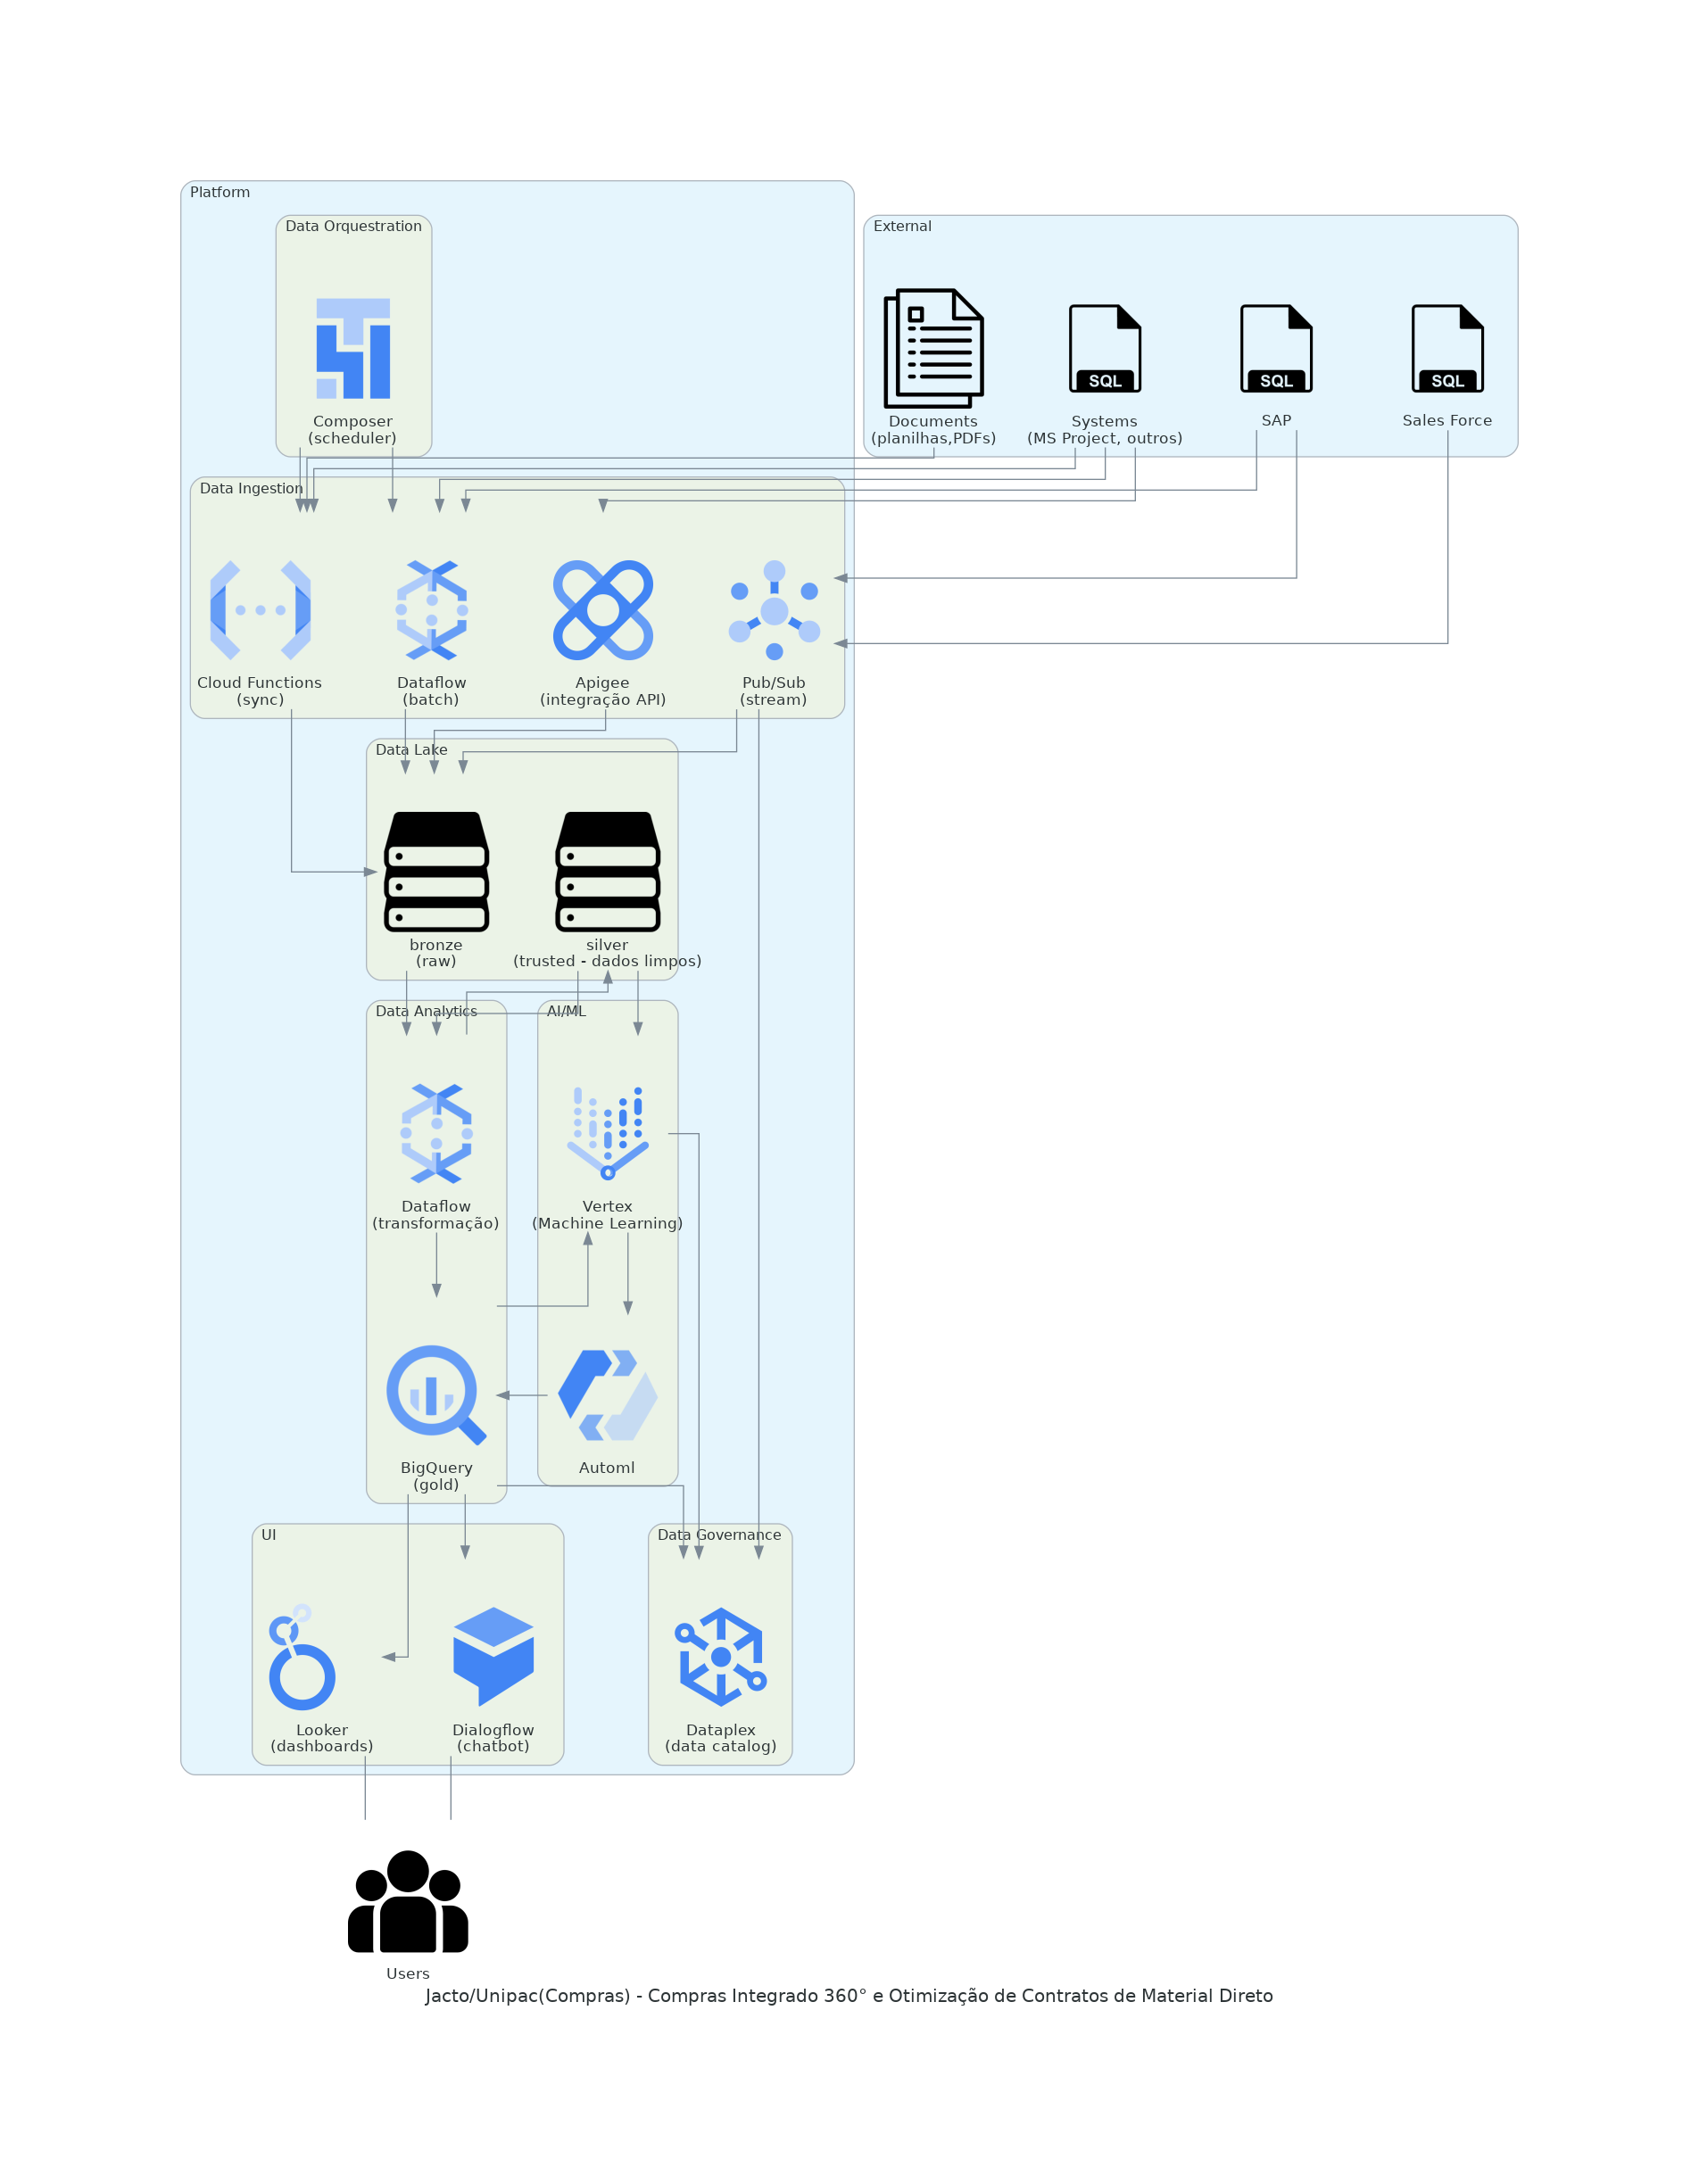

In [10]:
title = "Jacto/Unipac(Compras) - Compras Integrado 360° e Otimização de Contratos de Material Direto"
filename = "diagrams/jacto-unipac-compras-proposta8-integracao"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")         
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker
    gold >> dialogflow

    [vertex, gold, stream] >> datacatalog

    looker - users
    dialogflow - users

diag


### Proposta 9 - Materiais Indiretos 360° e Gestão a Vista

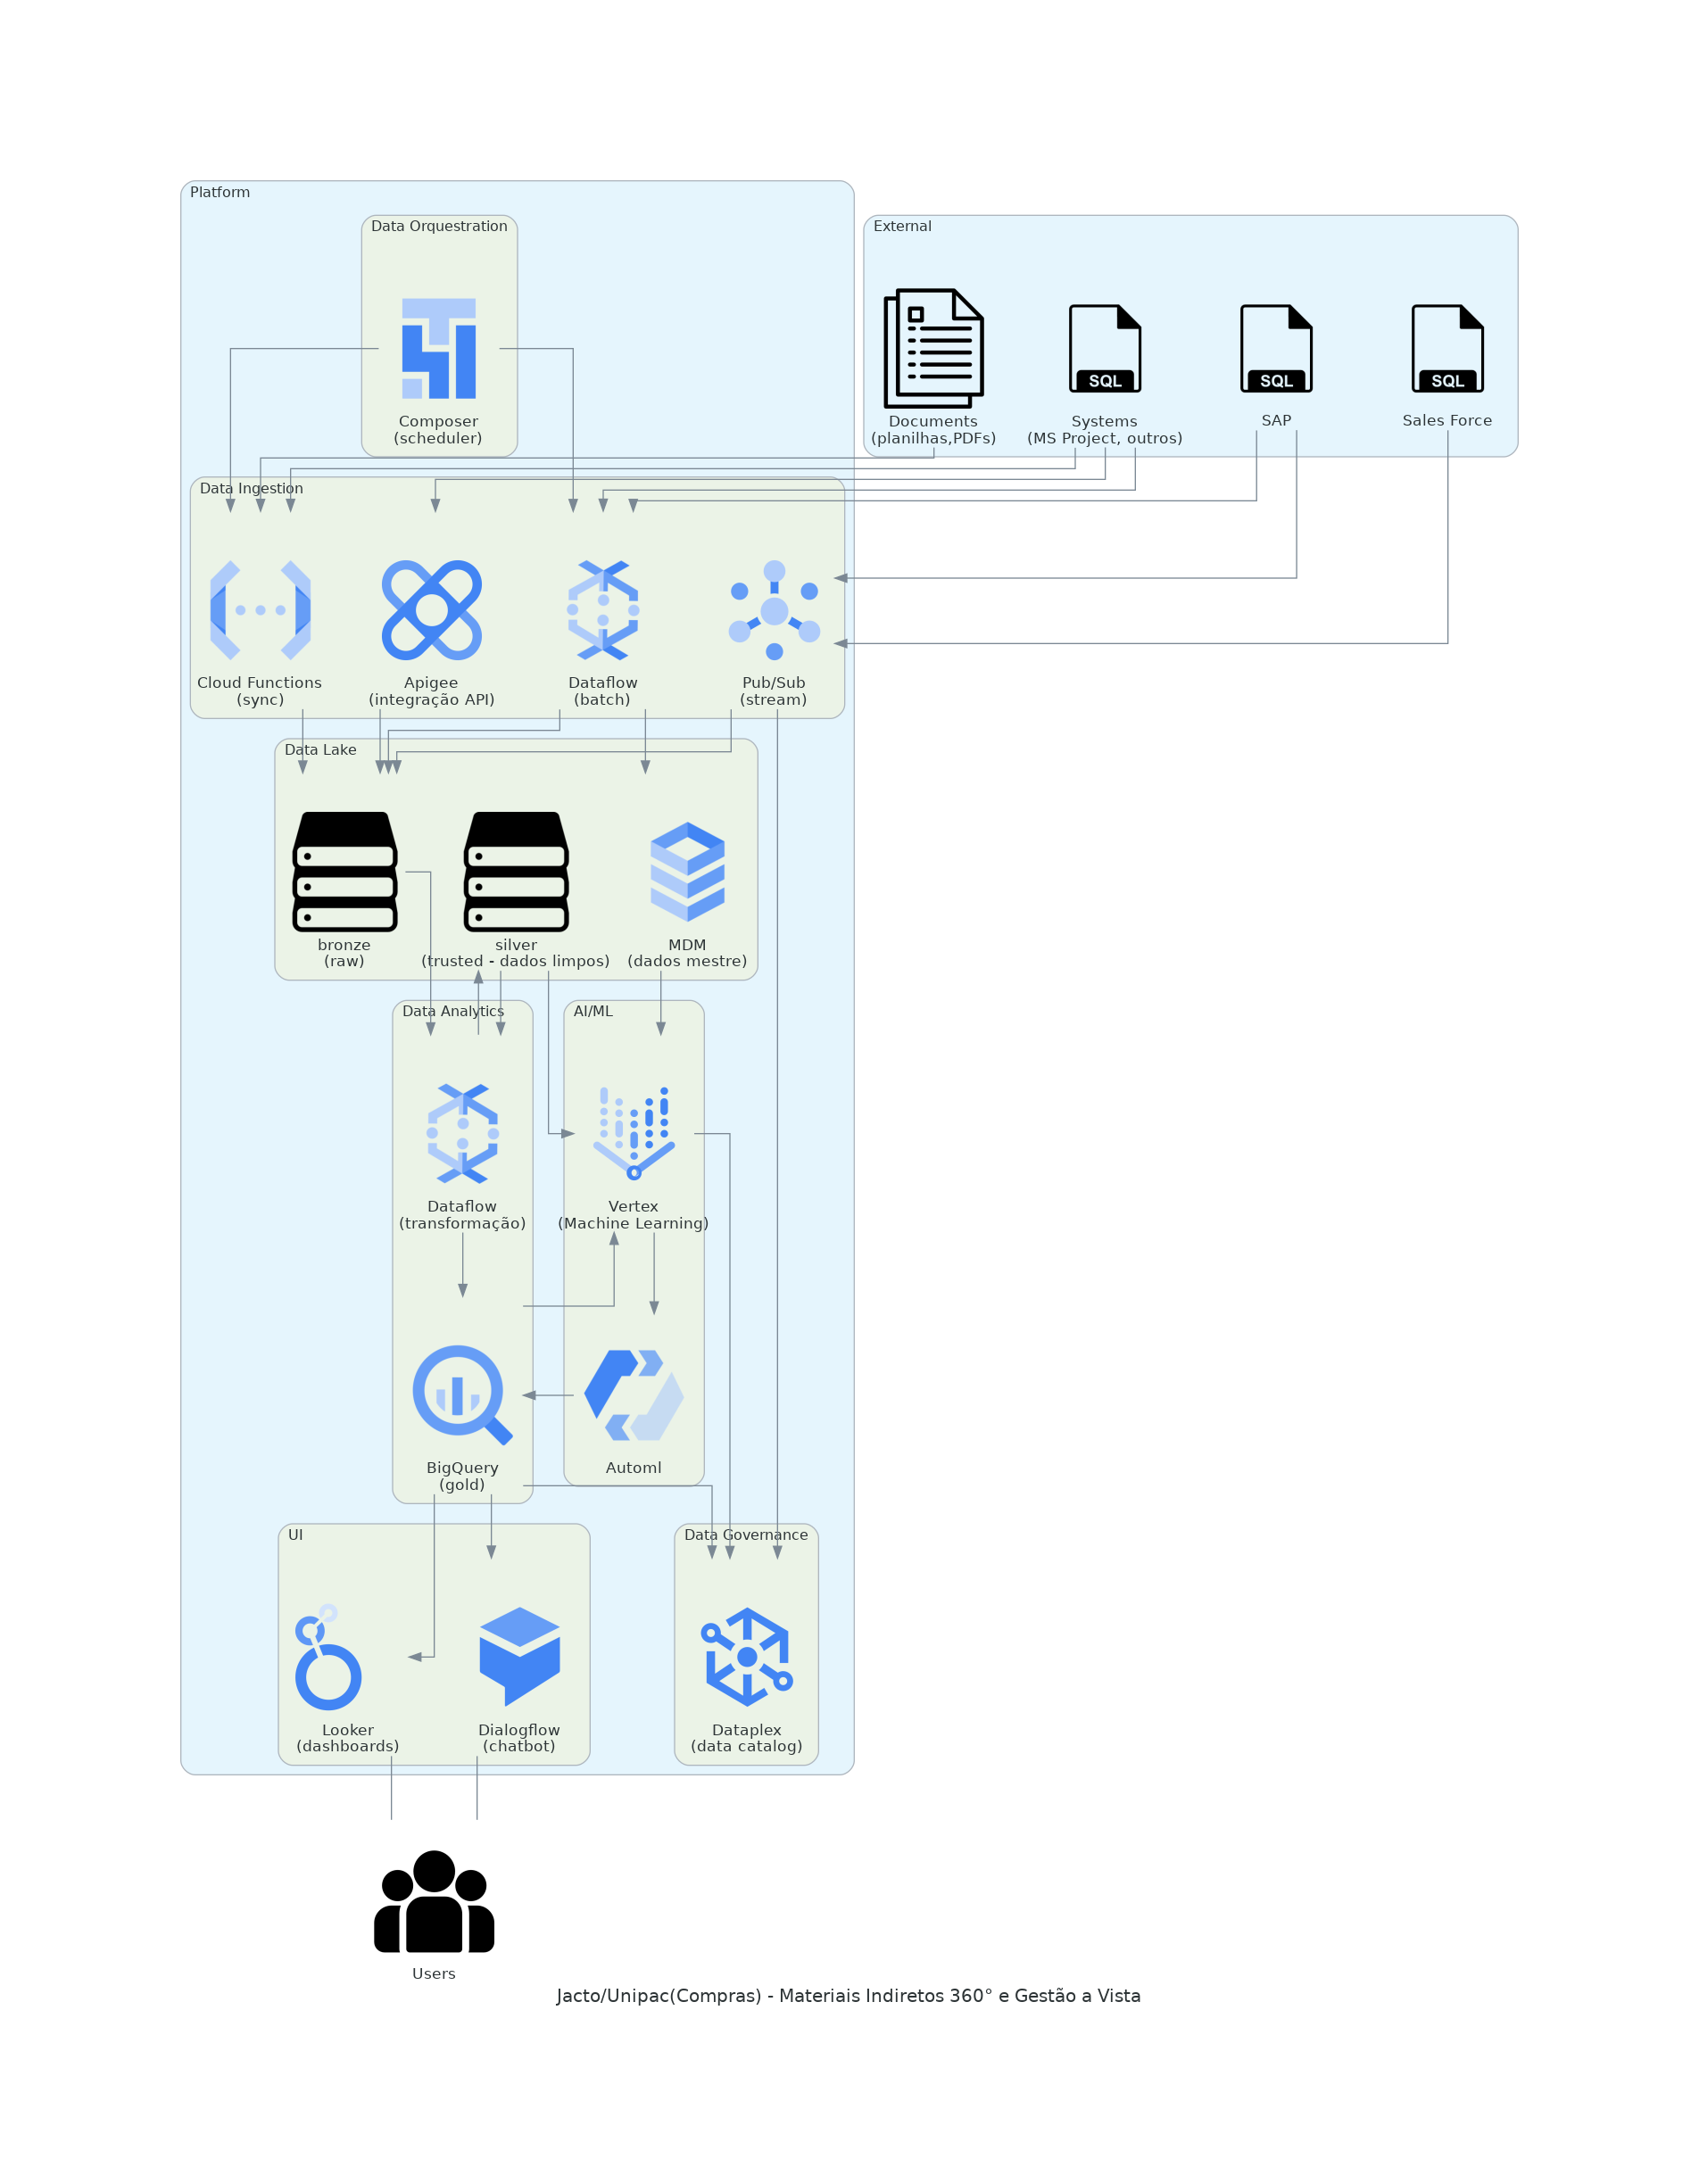

In [11]:
title = "Jacto/Unipac(Compras) - Materiais Indiretos 360° e Gestão a Vista"
filename = "diagrams/jacto-unipac-compras-proposta9-indiretos"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")         
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")                          

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            mdm = gcp_sql("MDM\n(dados mestre)")
            
        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze, mdm]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users
    dialogflow - users

diag